In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-05-02 10:02:33.289862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 10:02:33.728229: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 10:02:35.752997: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib
2024-05-02 10:02:35.753141: W tensorflow/co

In [6]:
# Load and preprocess the dataset
eeg_data_path = "Epileptic Seizure Recognition.csv"
eeg_df = pd.read_csv(eeg_data_path)
eeg_df.drop(['Unnamed'], axis=1, inplace=True)  # Assuming the column to drop is 'Unnamed: 0'

# Reclassify the 'y' column
class0 = [2, 3, 4, 5]
class1 = [1]

def label_class(row):
    if row['y'] in class0:
        return 0
    elif row['y'] in class1:
        return 1
    return row['y']

eeg_df['y'] = eeg_df.apply(label_class, axis=1)



In [7]:
eeg_df

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   
1      386  382  356  331  320  315  307  272  244  232  ...   164   150   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    15    16   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -65   -33   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -65   -48   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   121   135   
11499   29   41   57   72   74   62   54   43   31   23  ...   -59   -25   

       X172  X173  X174  X175  X176  X177  X178  y  
0       -31   -77  -103  -127  -116   -83   -51  0  
1       146   152   157   156   154   143   129  1  
2        48    19   -12   -30   -35   -35   -36  0  
3       -80   -77   -85   -77   -72   -69   -65  0  
4       -12   -32   -41   -65   -83   -89   -73  0  
...     ...   ...   ...   ...   ...   ...   ... ..  
11495    12     5    -1   -18   -37   -47   -48  0  
11496    -7    14    27    48    77   117   170  1  
11497   -61   -62   -67   -30    -2    -1    -8  0  
11498   148   143   116    86    68    59    55  0  
11499    -4     2     5     4    -2     2    20  0  

[11500 rows x 179 columns]

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Step 1: Replace '-' with NaN (Not a Number)
eeg_df.replace('-', pd.NA, inplace=True)

# Step 2: Convert columns to numeric, forcing errors to NaN
eeg_df = eeg_df.apply(pd.to_numeric, errors='coerce')

# Step 3: Fill NaN values with the mean or median of the column
eeg_df.fillna(eeg_df.mean(), inplace=True)

# Normalize the data
scaler = MinMaxScaler()
eeg_df.iloc[:, :-1] = scaler.fit_transform(eeg_df.iloc[:, :-1])

# Separate epileptic and non-epileptic data
epileptic_df = eeg_df[eeg_df['y'] == 1]  # Assuming 1 is epileptic
non_epileptic_df = eeg_df[eeg_df['y'] != 1]

# Select a sample from real data
real_epileptic_data = epileptic_df.sample(5).drop('y', axis=1).values
real_non_epileptic_data = non_epileptic_df.sample(5).drop('y', axis=1).values


In [13]:
x_data

array([[0.6241234 , 0.625176  , 0.6203284 , ..., 0.5054859 , 0.4954955 ,
        0.5229701 ],
       [0.43786815, 0.4483244 , 0.45866364, ..., 0.43260187, 0.43667197,
        0.47783118],
       [0.4690042 , 0.4528302 , 0.44026047, ..., 0.52142113, 0.50132483,
        0.51602566],
       ...,
       [0.5096774 , 0.49957758, 0.48527747, ..., 0.4422675 , 0.4528352 ,
        0.4722222 ],
       [0.5082749 , 0.5026753 , 0.4957531 , ..., 0.46159875, 0.4554849 ,
        0.48530984],
       [0.5026648 , 0.51450294, 0.5274632 , ..., 0.48537096, 0.48860624,
        0.53392094]], dtype=float32)

In [14]:
y_data

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [10]:
# Splitting the dataset for positive class (Class 1 - Epileptic Seizure)
positive_df = eeg_df[eeg_df['y'] == 1]
x_data = positive_df.drop('y', axis=1).values
y_data = positive_df[['y']].values

In [11]:
x_data = positive_df.drop('y', axis=1).values.astype('float32')  # Convert to float32
y_data = positive_df[['y']].values.astype('float32')  # Convert to float32, if used


In [12]:

# Check the shapes of x_data and y_data after the adjustments
print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)

x_data shape: (2300, 178)
y_data shape: (2300, 1)


##GAN 1

In [ ]:
# Building the discriminator network
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(178,)),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for probabilistic output
], name="SigXNet-Discriminator")

discriminator.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
    loss=tf.keras.losses.binary_crossentropy,  # Correct based on sigmoid output
    metrics=['accuracy']
)
discriminator.summary()
# Define the generator model using SigXNet
generator = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(100,)),  # Latent dimension size
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dense(178, activation='tanh')  # Outputs should match the discriminator's input shape
], name="SigXNet-Generator")

# Compile the generator
generator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Use Adam optimizer for generator
    loss=tf.keras.losses.binary_crossentropy  # Generator loss is not used in training GANs
)
# Compiling the GAN model
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        # Sample random points in the latent space
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 100))

        # Decode them to fake data
        generated_data = self.generator(random_latent_vectors)

        # Combine them with real data
        combined_data = tf.concat([generated_data, real_data], axis=0)
        labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)  # Reversed labels for training
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_data)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Misleading labels for the generator
        misleading_labels = tf.ones((batch_size, 1))

        # Train the generator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        return {'d_loss': d_loss, 'g_loss': g_loss}

    def generate(self, num_samples):
        random_latent_vectors = tf.random.normal(shape=(num_samples, 100))
        return self.generator(random_latent_vectors).numpy()

# Instantiate and compile the GAN
gan = GAN(discriminator=discriminator, generator=generator)
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False)  # Align this with sigmoid activation in discriminator
)

gan.fit(x_data, epochs=2000)  # Number of epochs and callbacks as per your specific needs

Model: "SigXNet-Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               22912     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 23041 (90.00 KB)
Trainable params: 23041 (90.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
72/72 [==============================] - 1s 4ms/step - d_loss: 0.3611 - g_loss: 0.8156
Epoch 2/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.2802 - g_loss: 0.7786
Epoch 3/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.2554 - g_loss: 0.7739
Epoch 4/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.2391 - g_loss: 0.7811
Epoch

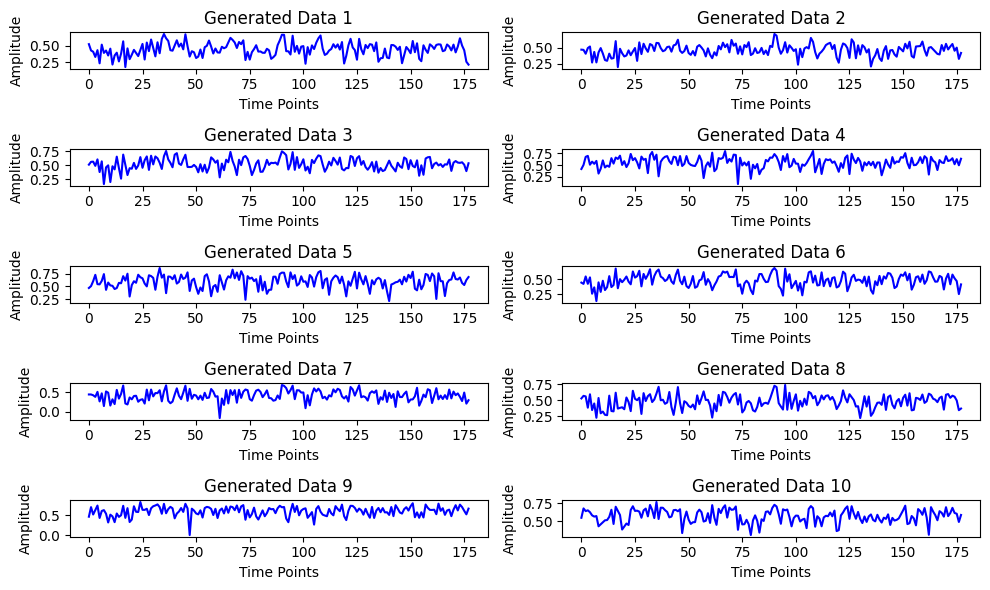

In [ ]:
import matplotlib.pyplot as plt

def plot_generated_data(generated_data):
    plt.figure(figsize=(10, 6))
    for i in range(generated_data.shape[0]):
        plt.subplot(5, 2, i + 1)  # Adjust the grid size according to how many samples you want to plot
        plt.plot(generated_data[i], color='blue')
        plt.title(f"Generated Data {i+1}")
        plt.xlabel('Time Points')
        plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Generate data
num_samples_to_generate = 10
generated_data = gan.generate(num_samples_to_generate)

# Plot the generated data
plot_generated_data(generated_data)


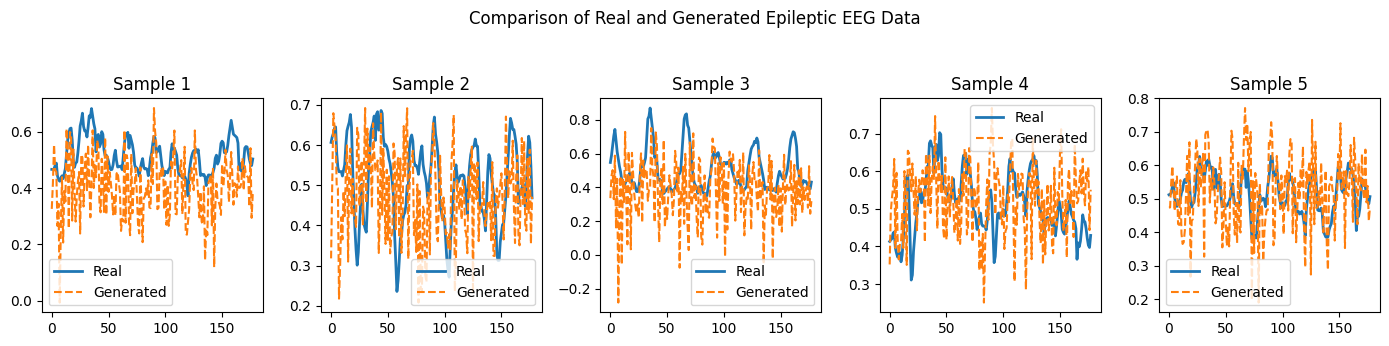

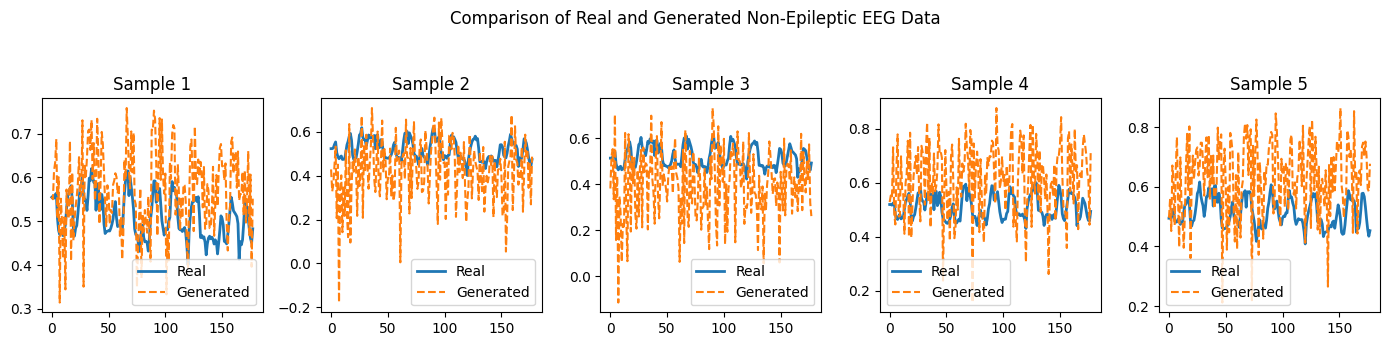

MSE for Epileptic Data: 0.02486461920352354
MSE for Non-Epileptic Data: 0.02562124695733393


In [ ]:
# Generate data using the trained GAN
synthetic_data = gan.generate(10)  # Adjust size according to need

# Assuming first 5 are meant to simulate epileptic data and next 5 for non-epileptic
synthetic_epileptic_data = synthetic_data[:5]
synthetic_non_epileptic_data = synthetic_data[5:]
def plot_eeg_data(real_data, generated_data, title):
    plt.figure(figsize=(14, 6))
    for i, (real, generated) in enumerate(zip(real_data, generated_data)):
        plt.subplot(2, 5, i + 1)
        plt.plot(real, label='Real', linewidth=2)
        plt.plot(generated, label='Generated', linestyle='--')
        plt.title(f'Sample {i+1}')
        plt.legend()
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
plot_eeg_data(real_epileptic_data, synthetic_epileptic_data, 'Comparison of Real and Generated Epileptic EEG Data')
plot_eeg_data(real_non_epileptic_data, synthetic_non_epileptic_data, 'Comparison of Real and Generated Non-Epileptic EEG Data')
def mean_squared_error(real, generated):
    return np.mean((real - generated) ** 2)

# Calculate MSE for Epileptic
mse_epileptic = mean_squared_error(real_epileptic_data.flatten(), synthetic_epileptic_data.flatten())
print(f'MSE for Epileptic Data: {mse_epileptic}')

# Calculate MSE for Non-Epileptic
mse_non_epileptic = mean_squared_error(real_non_epileptic_data.flatten(), synthetic_non_epileptic_data.flatten())
print(f'MSE for Non-Epileptic Data: {mse_non_epileptic}')


## GAN 2

In [ ]:
from tensorflow.keras import layers, models, optimizers, losses

# Building a more complex discriminator network
discriminator = models.Sequential([
    layers.Input(shape=(178,)),
    layers.Dense(256, activation='leaky_relu', kernel_initializer='he_uniform'),
    layers.LayerNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='leaky_relu', kernel_initializer='he_uniform'),
    layers.LayerNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
], name="Improved-Discriminator")

discriminator.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)


In [ ]:
# Building a more complex generator network
generator = models.Sequential([
    layers.Input(shape=(100,)),  # Latent dimension size
    layers.Dense(256, activation='leaky_relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='leaky_relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dense(178, activation='tanh')
], name="Improved-Generator")

# Note: The generator's loss isn't used when training GANs as a whole, but it's set up for possible evaluation.
generator.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss=losses.binary_crossentropy
)


In [ ]:
class ImprovedGAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(ImprovedGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ImprovedGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 100))

        generated_data = self.generator(random_latent_vectors)
        combined_data = tf.concat([generated_data, real_data], axis=0)
        labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))  # Adding noise to labels

        with tf.GradientTape() as disc_tape:
            predictions = self.discriminator(combined_data)
            d_loss = self.loss_fn(labels, predictions)

        grads = disc_tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        misleading_labels = tf.ones((batch_size, 1))

        with tf.GradientTape() as gen_tape:
            fake_predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, fake_predictions)

        grads = gen_tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        return {'d_loss': d_loss, 'g_loss': g_loss}

# Instantiate and compile the improved GAN
improved_gan = ImprovedGAN(discriminator=discriminator, generator=generator)
improved_gan.compile(
    d_optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.5),
    g_optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.5),
    loss_fn=losses.BinaryCrossentropy(from_logits=False)
)


In [ ]:
gan.fit(x_data, epochs=2000)  # Number of epochs and callbacks as per your specific needs

Epoch 1/2000
72/72 [==============================] - 0s 5ms/step - d_loss: 0.6120 - g_loss: 0.7715
Epoch 2/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6039 - g_loss: 0.7691
Epoch 3/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6640 - g_loss: 0.7174
Epoch 4/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6581 - g_loss: 0.7367
Epoch 5/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6389 - g_loss: 0.7677
Epoch 6/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6849 - g_loss: 0.7220
Epoch 7/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6801 - g_loss: 0.7215
Epoch 8/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6446 - g_loss: 0.7577
Epoch 9/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5991 - g_loss: 0.8213
Epoch 10/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5960 - g_loss: 0.8274

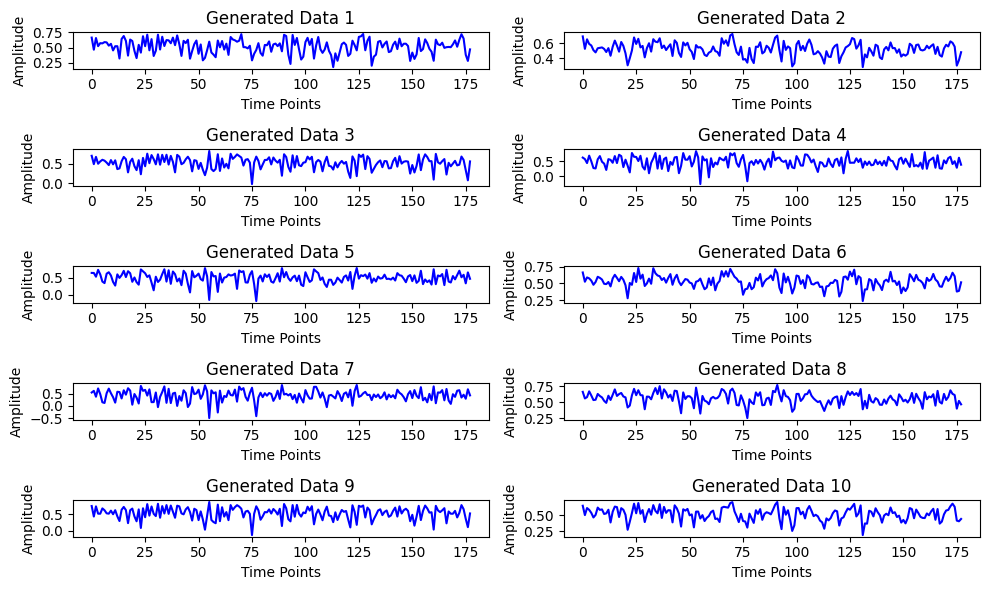

In [ ]:
import matplotlib.pyplot as plt

def plot_generated_data(generated_data):
    plt.figure(figsize=(10, 6))
    for i in range(generated_data.shape[0]):
        plt.subplot(5, 2, i + 1)  # Adjust the grid size according to how many samples you want to plot
        plt.plot(generated_data[i], color='blue')
        plt.title(f"Generated Data {i+1}")
        plt.xlabel('Time Points')
        plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Generate data
num_samples_to_generate = 10
generated_data = gan.generate(num_samples_to_generate)

# Plot the generated data
plot_generated_data(generated_data)


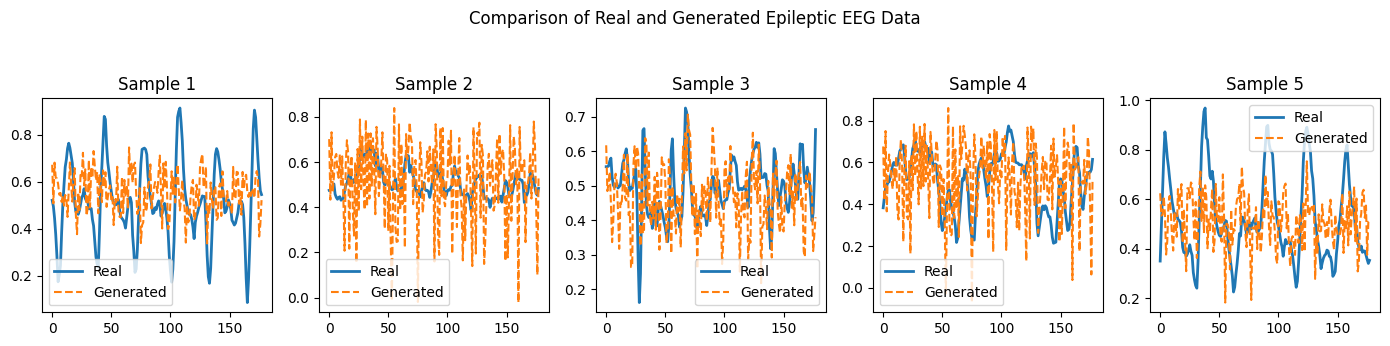

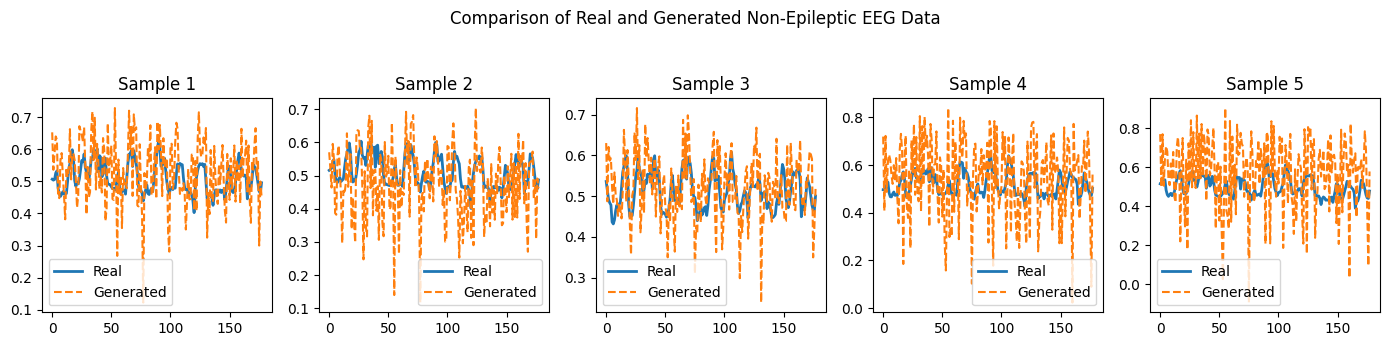

MSE for Epileptic Data: 0.03238274833349093
MSE for Non-Epileptic Data: 0.018353658978932423


In [ ]:
# Generate data using the trained GAN
synthetic_data = gan.generate(10)  # Adjust size according to need

# Assuming first 5 are meant to simulate epileptic data and next 5 for non-epileptic
synthetic_epileptic_data = synthetic_data[:5]
synthetic_non_epileptic_data = synthetic_data[5:]
def plot_eeg_data(real_data, generated_data, title):
    plt.figure(figsize=(14, 6))
    for i, (real, generated) in enumerate(zip(real_data, generated_data)):
        plt.subplot(2, 5, i + 1)
        plt.plot(real, label='Real', linewidth=2)
        plt.plot(generated, label='Generated', linestyle='--')
        plt.title(f'Sample {i+1}')
        plt.legend()
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
plot_eeg_data(real_epileptic_data, synthetic_epileptic_data, 'Comparison of Real and Generated Epileptic EEG Data')
plot_eeg_data(real_non_epileptic_data, synthetic_non_epileptic_data, 'Comparison of Real and Generated Non-Epileptic EEG Data')
def mean_squared_error(real, generated):
    return np.mean((real - generated) ** 2)

# Calculate MSE for Epileptic
mse_epileptic = mean_squared_error(real_epileptic_data.flatten(), synthetic_epileptic_data.flatten())
print(f'MSE for Epileptic Data: {mse_epileptic}')

# Calculate MSE for Non-Epileptic
mse_non_epileptic = mean_squared_error(real_non_epileptic_data.flatten(), synthetic_non_epileptic_data.flatten())
print(f'MSE for Non-Epileptic Data: {mse_non_epileptic}')


## GAN 3

In [ ]:
discriminator = models.Sequential([
    layers.Input(shape=(178,)),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.2),
    layers.Dropout(0.4),
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.2),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
], name="Balanced-Discriminator")

discriminator.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)


In [ ]:
generator = models.Sequential([
    layers.Input(shape=(100,)),
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(momentum=0.8),
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(momentum=0.8),
    layers.Dense(178, activation='tanh')
], name="Balanced-Generator")

generator.compile(
    optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss=losses.binary_crossentropy
)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, display_interval=100):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.display_interval = display_interval

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 100))

        # Update discriminator less frequently
        if tf.random.uniform(()) < 0.5:
            generated_data = self.generator(random_latent_vectors)
            combined_data = tf.concat([generated_data, real_data], axis=0)
            labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)
            labels += 0.05 * tf.random.uniform(tf.shape(labels))

            with tf.GradientTape() as disc_tape:
                predictions = self.discriminator(combined_data)
                d_loss = self.loss_fn(labels, predictions)
            grads = disc_tape.gradient(d_loss, self.discriminator.trainable_weights)
            self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Generator training
        misleading_labels = tf.ones((batch_size, 1))
        with tf.GradientTape() as gen_tape:
            fake_predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, fake_predictions)
        grads = gen_tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        return {'d_loss': d_loss, 'g_loss': g_loss}

    def fit(self, *args, **kwargs):
        for epoch in range(kwargs['epochs']):
            super(GAN, self).fit(*args, epochs=1, verbose=0)
            if (epoch + 1) % self.display_interval == 0:
                self.display_progress(epoch)

    def display_progress(self, epoch):
        num_examples = 10  # Adjust based on how many examples you want to display
        random_latent_vectors = tf.random.normal(shape=(num_examples, 100))
        generated_images = self.generator(random_latent_vectors)
        real_data_samples = next(iter(x_data.take(num_examples)))  # Assumes x_data is a tf.data.Dataset

        plt.figure(figsize=(20, 4))
        for i in range(num_examples):
            # Display original
            ax = plt.subplot(2, num_examples, i + 1)
            plt.imshow(real_data_samples[i].numpy().reshape(28, 28))  # Adjust shape based on data
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Display generated
            ax = plt.subplot(2, num_examples, i + 1 + num_examples)
            plt.imshow(generated_images[i].numpy().reshape(28, 28))  # Adjust shape based on data
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        plt.show()
        print(f"Epoch: {epoch + 1}")


In [ ]:

# Instantiate and compile the improved GAN
_gan1 = ImprovedGAN(discriminator=discriminator, generator=generator)
_gan1.compile(
    d_optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.5),
    g_optimizer=optimizers.Adam(learning_rate=0.0001, beta_1=0.5),
    loss_fn=losses.BinaryCrossentropy(from_logits=False)
)

In [ ]:
gan.fit(x_data, epochs=2000)  # Number of epochs and callbacks as per your specific needs

Epoch 1/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5976 - g_loss: 0.8216
Epoch 2/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5733 - g_loss: 0.8570
Epoch 3/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5876 - g_loss: 0.8501
Epoch 4/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6526 - g_loss: 0.7843
Epoch 5/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6871 - g_loss: 0.7520
Epoch 6/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6364 - g_loss: 0.7985
Epoch 7/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5699 - g_loss: 0.8792
Epoch 8/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.5216 - g_loss: 0.9350
Epoch 9/2000
72/72 [==============================] - 0s 5ms/step - d_loss: 0.5543 - g_loss: 0.9010
Epoch 10/2000
72/72 [==============================] - 0s 4ms/step - d_loss: 0.6196 - g_loss: 0.8085

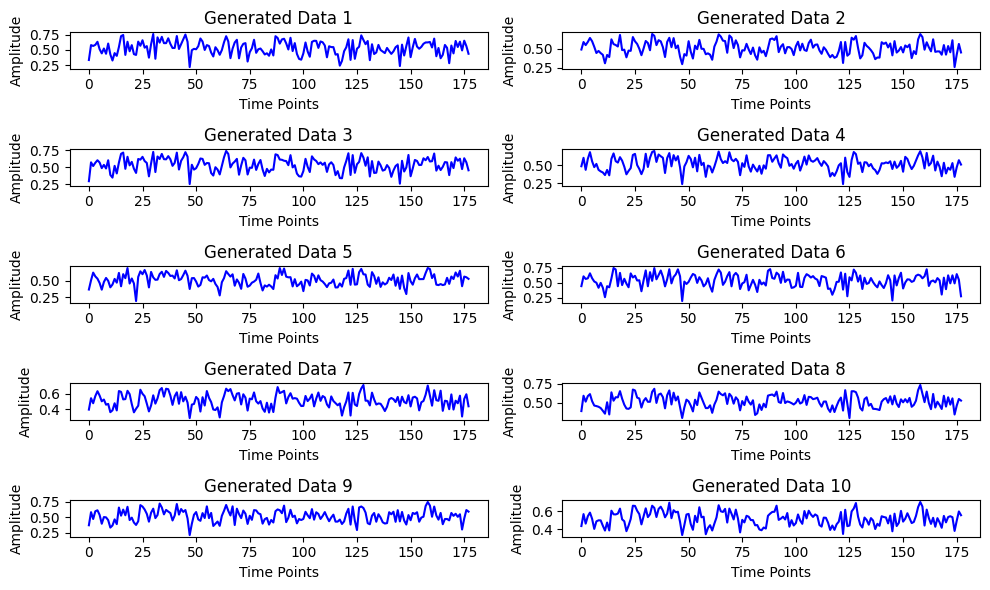

In [ ]:
import matplotlib.pyplot as plt

def plot_generated_data(generated_data):
    plt.figure(figsize=(10, 6))
    for i in range(generated_data.shape[0]):
        plt.subplot(5, 2, i + 1)  # Adjust the grid size according to how many samples you want to plot
        plt.plot(generated_data[i], color='blue')
        plt.title(f"Generated Data {i+1}")
        plt.xlabel('Time Points')
        plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Generate data
num_samples_to_generate = 10
generated_data = gan.generate(num_samples_to_generate)

# Plot the generated data
plot_generated_data(generated_data)


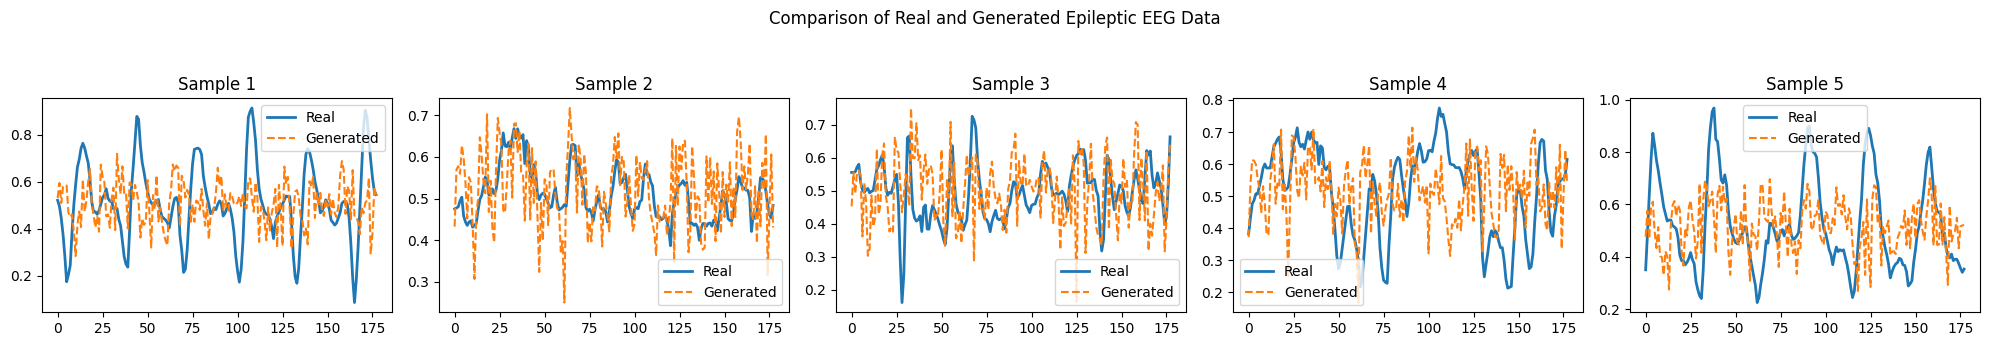

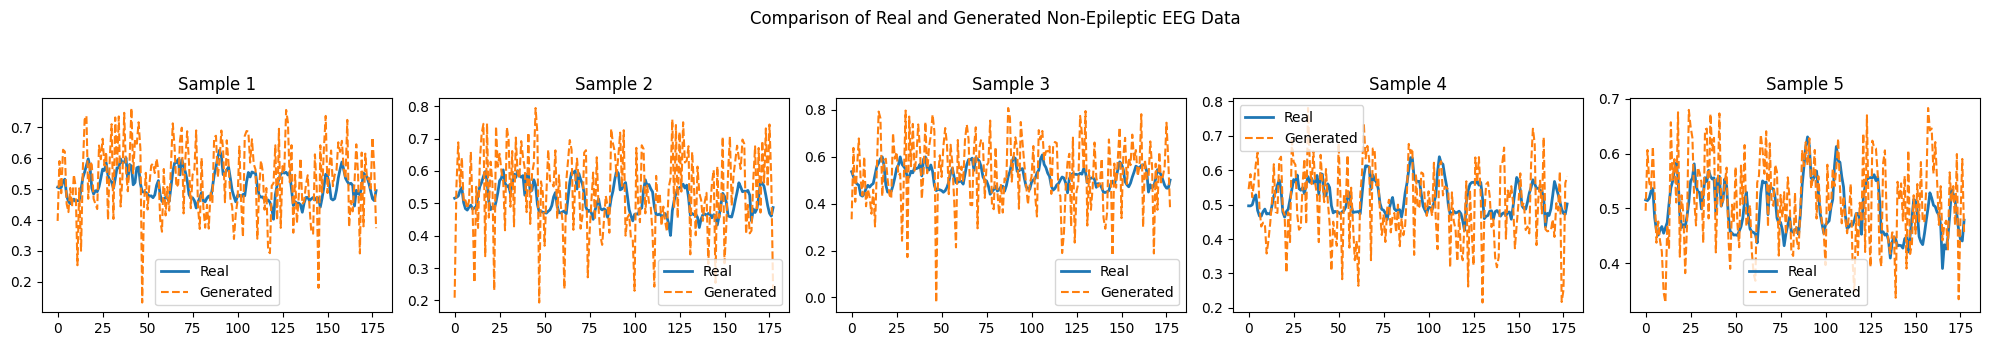

MSE for Epileptic Data: 0.022923235956405604
MSE for Non-Epileptic Data: 0.013151629615990817


In [ ]:
# Generate data using the trained GAN
synthetic_data = gan.generate(10)  # Adjust size according to need

# Assuming first 5 are meant to simulate epileptic data and next 5 for non-epileptic
synthetic_epileptic_data = synthetic_data[:5]
synthetic_non_epileptic_data = synthetic_data[5:]
def plot_eeg_data(real_data, generated_data, title):
    plt.figure(figsize=(20, 6))
    for i, (real, generated) in enumerate(zip(real_data, generated_data)):
        plt.subplot(2, 5, i + 1)
        plt.plot(real, label='Real', linewidth=2)
        plt.plot(generated, label='Generated', linestyle='--')
        plt.title(f'Sample {i+1}')
        plt.legend()
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
plot_eeg_data(real_epileptic_data, synthetic_epileptic_data, 'Comparison of Real and Generated Epileptic EEG Data')
plot_eeg_data(real_non_epileptic_data, synthetic_non_epileptic_data, 'Comparison of Real and Generated Non-Epileptic EEG Data')
def mean_squared_error(real, generated):
    return np.mean((real - generated) ** 2)

# Calculate MSE for Epileptic
mse_epileptic = mean_squared_error(real_epileptic_data.flatten(), synthetic_epileptic_data.flatten())
print(f'MSE for Epileptic Data: {mse_epileptic}')

# Calculate MSE for Non-Epileptic
mse_non_epileptic = mean_squared_error(real_non_epileptic_data.flatten(), synthetic_non_epileptic_data.flatten())
print(f'MSE for Non-Epileptic Data: {mse_non_epileptic}')


##WAveGan


In [20]:
from tensorflow.keras import layers, models, optimizers, losses


In [21]:
def build_generator(latent_dim=100):
    model = tf.keras.Sequential([
        layers.Dense(11 * 16, use_bias=False, input_shape=(latent_dim,)),  # Adjust the dense layer size for reshape
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((11, 16)),  # Reshape to match transposed convolutions properly
        layers.Conv1DTranspose(128, kernel_size=3, strides=2, padding='same', use_bias=False),  # Upscales to 22
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv1DTranspose(64, kernel_size=3, strides=2, padding='same', use_bias=False),  # Upscales to 44
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv1DTranspose(32, kernel_size=3, strides=2, padding='same', use_bias=False),  # Upscales to 88
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv1DTranspose(16, kernel_size=3, strides=2, padding='same', use_bias=False),  # Upscales to 176
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv1DTranspose(1, kernel_size=3, strides=1, padding='valid', use_bias=False, activation='tanh'),  # No cropping, adjust kernel or stride
    ])
    return model


In [22]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv1D(64, kernel_size=25, strides=4, padding='same', input_shape=(178, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv1D(128, kernel_size=25, strides=4, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [23]:
# Assuming x_data is your raw data with shape (2300, 178)
x_data = x_data.reshape(x_data.shape[0], 178, 1)  # Reshape data for GAN input
x_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) * 2 - 1  # Normalize data to [-1, 1]


In [24]:

x_data

array([[[ 0.24824679],
        [ 0.25035203],
        [ 0.24065685],
        ...,
        [ 0.01097178],
        [-0.009009  ],
        [ 0.04594016]],

       [[-0.1242637 ],
        [-0.10335118],
        [-0.08267272],
        ...,
        [-0.13479626],
        [-0.12665606],
        [-0.04433763]],

       [[-0.06199157],
        [-0.09433961],
        [-0.11947906],
        ...,
        [ 0.04284227],
        [ 0.00264966],
        [ 0.03205132]],

       ...,

       [[ 0.01935482],
        [-0.00084484],
        [-0.02944505],
        ...,
        [-0.11546499],
        [-0.0943296 ],
        [-0.05555558]],

       [[ 0.01654983],
        [ 0.00535059],
        [-0.00849378],
        ...,
        [-0.07680249],
        [-0.08903021],
        [-0.02938032]],

       [[ 0.00532961],
        [ 0.02900589],
        [ 0.0549264 ],
        ...,
        [-0.02925807],
        [-0.02278751],
        [ 0.06784189]]], dtype=float32)

In [25]:
class WaveGAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(WaveGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(WaveGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 100))

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(random_latent_vectors, training=True)

            real_output = self.discriminator(real_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)

            gen_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)
            real_loss = self.loss_fn(tf.ones_like(real_output), real_output)
            fake_loss = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            disc_loss = real_loss + fake_loss

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_weights)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_weights)

        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_weights))
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_weights))

        return {'gen_loss': gen_loss, 'disc_loss': disc_loss}

# Create the models
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()

# Compile the model
wavegan = WaveGAN(discriminator=discriminator, generator=generator)
wavegan.compile(
    d_optimizer=optimizers.Adam(1e-4),
    g_optimizer=optimizers.Adam(1e-4),
    loss_fn=losses.BinaryCrossentropy(from_logits=True)
)

# Training needs real audio data reshaped to (batch_size, 1024, 1)
wavegan.fit(x_data, epochs=5000)

2024-05-02 10:07:05.072281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 10:07:05.143081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 10:07:05.143193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-02 10:07:05.146330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them i

Epoch 1/5000


/home/student/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-05-02 10:07:14.381433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-05-02 10:07:18.909098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-02 10:07:18.990169: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-02 10:07:21.730151: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f33e0008f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-02 10:07:21.730213: I tensorflow/compiler/xla

72/72 [==============================] - 18s 39ms/step - gen_loss: 1.0168 - disc_loss: 1.1269
Epoch 2/5000
72/72 [==============================] - 2s 34ms/step - gen_loss: 1.8040 - disc_loss: 0.6978
Epoch 3/5000
72/72 [==============================] - 3s 36ms/step - gen_loss: 1.9278 - disc_loss: 0.5400
Epoch 4/5000
72/72 [==============================] - 2s 31ms/step - gen_loss: 2.4097 - disc_loss: 0.3647
Epoch 5/5000
72/72 [==============================] - 2s 32ms/step - gen_loss: 2.6882 - disc_loss: 0.2616
Epoch 6/5000
72/72 [==============================] - 2s 35ms/step - gen_loss: 2.9186 - disc_loss: 0.3088
Epoch 7/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 2.5605 - disc_loss: 0.3317
Epoch 8/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 1.8192 - disc_loss: 0.5905
Epoch 9/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 1.4817 - disc_loss: 0.7373
Epoch 10/5000
72/72 [==============================] - 3s 

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9203 - disc_loss: 1.1390
Epoch 78/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9199 - disc_loss: 1.1578
Epoch 79/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9077 - disc_loss: 1.2098
Epoch 80/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8998 - disc_loss: 1.1941
Epoch 81/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8856 - disc_loss: 1.1479
Epoch 82/5000
72/72 [==============================] - 4s 48ms/step - gen_loss: 0.9582 - disc_loss: 1.1549
Epoch 83/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.8719 - disc_loss: 1.1661
Epoch 84/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9866 - disc_loss: 1.1565
Epoch 85/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9150 - disc_loss: 1.1596
Epoch 86/5000
72/72 [==============================

72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9727 - disc_loss: 1.2193
Epoch 154/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 1.1434 - disc_loss: 1.1266
Epoch 155/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9386 - disc_loss: 1.1061
Epoch 156/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8343 - disc_loss: 1.2296
Epoch 157/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9430 - disc_loss: 1.1041
Epoch 158/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 1.1103 - disc_loss: 1.1874
Epoch 159/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 1.2794 - disc_loss: 0.9835
Epoch 160/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9820 - disc_loss: 1.1365
Epoch 161/5000
72/72 [==============================] - 2s 30ms/step - gen_loss: 0.8546 - disc_loss: 1.2346
Epoch 162/5000
72/72 [=====================

Epoch 229/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9088 - disc_loss: 1.2823
Epoch 230/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9039 - disc_loss: 1.2765
Epoch 231/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9219 - disc_loss: 1.1847
Epoch 232/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.8879 - disc_loss: 1.3207
Epoch 233/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.8311 - disc_loss: 1.2660
Epoch 234/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9051 - disc_loss: 1.2493
Epoch 235/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8884 - disc_loss: 1.2505
Epoch 236/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8882 - disc_loss: 1.2625
Epoch 237/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8502 - disc_loss: 1.2856
Epoch 238/5000
72/72 [======

72/72 [==============================] - 4s 52ms/step - gen_loss: 0.8886 - disc_loss: 1.2406
Epoch 305/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8340 - disc_loss: 1.3309
Epoch 306/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.8829 - disc_loss: 1.2976
Epoch 307/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.7975 - disc_loss: 1.3697
Epoch 308/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9310 - disc_loss: 1.1815
Epoch 309/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8703 - disc_loss: 1.3302
Epoch 310/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.7818 - disc_loss: 1.4025
Epoch 311/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8794 - disc_loss: 1.2214
Epoch 312/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8526 - disc_loss: 1.3048
Epoch 313/5000
72/72 [=====================

Epoch 380/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8329 - disc_loss: 1.2809
Epoch 381/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.7857 - disc_loss: 1.3641
Epoch 382/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.8313 - disc_loss: 1.2635
Epoch 383/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8245 - disc_loss: 1.2530
Epoch 384/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8477 - disc_loss: 1.2763
Epoch 385/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8504 - disc_loss: 1.3252
Epoch 386/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8097 - disc_loss: 1.3474
Epoch 387/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8945 - disc_loss: 1.2140
Epoch 388/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8199 - disc_loss: 1.3221
Epoch 389/5000
72/72 [======

72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8154 - disc_loss: 1.2883
Epoch 456/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8610 - disc_loss: 1.2184
Epoch 457/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8766 - disc_loss: 1.2845
Epoch 458/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8512 - disc_loss: 1.2538
Epoch 459/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8320 - disc_loss: 1.2531
Epoch 460/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8423 - disc_loss: 1.3037
Epoch 461/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8442 - disc_loss: 1.2388
Epoch 462/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8129 - disc_loss: 1.2903
Epoch 463/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8504 - disc_loss: 1.2299
Epoch 464/5000
72/72 [=====================

Epoch 531/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 1.0078 - disc_loss: 1.1416
Epoch 532/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9055 - disc_loss: 1.3255
Epoch 533/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8299 - disc_loss: 1.2827
Epoch 534/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8909 - disc_loss: 1.1811
Epoch 535/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8576 - disc_loss: 1.2849
Epoch 536/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8887 - disc_loss: 1.2079
Epoch 537/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8384 - disc_loss: 1.2619
Epoch 538/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8755 - disc_loss: 1.2494
Epoch 539/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8796 - disc_loss: 1.2293
Epoch 540/5000
72/72 [======

72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9139 - disc_loss: 1.2026
Epoch 607/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8977 - disc_loss: 1.2687
Epoch 608/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9422 - disc_loss: 1.1557
Epoch 609/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8876 - disc_loss: 1.2399
Epoch 610/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8868 - disc_loss: 1.2558
Epoch 611/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9224 - disc_loss: 1.2188
Epoch 612/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8892 - disc_loss: 1.2444
Epoch 613/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9187 - disc_loss: 1.1847
Epoch 614/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8799 - disc_loss: 1.2580
Epoch 615/5000
72/72 [=====================

Epoch 682/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9612 - disc_loss: 1.2427
Epoch 683/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9422 - disc_loss: 1.2045
Epoch 684/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9581 - disc_loss: 1.2007
Epoch 685/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9359 - disc_loss: 1.2090
Epoch 686/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9758 - disc_loss: 1.1511
Epoch 687/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 1.0118 - disc_loss: 1.1500
Epoch 688/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9309 - disc_loss: 1.2237
Epoch 689/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9558 - disc_loss: 1.2095
Epoch 690/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9114 - disc_loss: 1.2517
Epoch 691/5000
72/72 [======

72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9611 - disc_loss: 1.1776
Epoch 758/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9885 - disc_loss: 1.1925
Epoch 759/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9217 - disc_loss: 1.1813
Epoch 760/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9924 - disc_loss: 1.1880
Epoch 761/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9844 - disc_loss: 1.1777
Epoch 762/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9551 - disc_loss: 1.2259
Epoch 763/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9493 - disc_loss: 1.1684
Epoch 764/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9359 - disc_loss: 1.1981
Epoch 765/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9723 - disc_loss: 1.1755
Epoch 766/5000
72/72 [=====================

Epoch 833/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9637 - disc_loss: 1.1678
Epoch 834/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 1.0059 - disc_loss: 1.1582
Epoch 835/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9547 - disc_loss: 1.2199
Epoch 836/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9766 - disc_loss: 1.1374
Epoch 837/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9954 - disc_loss: 1.2064
Epoch 838/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9784 - disc_loss: 1.1519
Epoch 839/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9758 - disc_loss: 1.1769
Epoch 840/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 1.0039 - disc_loss: 1.1822
Epoch 841/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9804 - disc_loss: 1.1508
Epoch 842/5000
72/72 [======

72/72 [==============================] - 3s 45ms/step - gen_loss: 1.0108 - disc_loss: 1.1550
Epoch 909/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9981 - disc_loss: 1.1487
Epoch 910/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9728 - disc_loss: 1.2451
Epoch 911/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 1.0244 - disc_loss: 1.1300
Epoch 912/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 1.0209 - disc_loss: 1.1580
Epoch 913/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 1.0051 - disc_loss: 1.2179
Epoch 914/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 1.0208 - disc_loss: 1.1265
Epoch 915/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 1.0032 - disc_loss: 1.1526
Epoch 916/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9841 - disc_loss: 1.2042
Epoch 917/5000
72/72 [=====================

Epoch 984/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9820 - disc_loss: 1.1914
Epoch 985/5000
72/72 [==============================] - 4s 53ms/step - gen_loss: 1.0161 - disc_loss: 1.1370
Epoch 986/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 1.0228 - disc_loss: 1.1682
Epoch 987/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9883 - disc_loss: 1.2104
Epoch 988/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9863 - disc_loss: 1.1744
Epoch 989/5000
72/72 [==============================] - 4s 53ms/step - gen_loss: 0.9988 - disc_loss: 1.1842
Epoch 990/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9634 - disc_loss: 1.1443
Epoch 991/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9733 - disc_loss: 1.1983
Epoch 992/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9915 - disc_loss: 1.1969
Epoch 993/5000
72/72 [======

72/72 [==============================] - 3s 47ms/step - gen_loss: 1.0153 - disc_loss: 1.1735
Epoch 1060/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9543 - disc_loss: 1.2052
Epoch 1061/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9903 - disc_loss: 1.1350
Epoch 1062/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 1.0104 - disc_loss: 1.2112
Epoch 1063/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9710 - disc_loss: 1.1599
Epoch 1064/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9915 - disc_loss: 1.1852
Epoch 1065/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 1.0040 - disc_loss: 1.1873
Epoch 1066/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9509 - disc_loss: 1.1996
Epoch 1067/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9633 - disc_loss: 1.1923
Epoch 1068/5000
72/72 [============

72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9389 - disc_loss: 1.1759
Epoch 1135/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9387 - disc_loss: 1.2385
Epoch 1136/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9627 - disc_loss: 1.1748
Epoch 1137/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9435 - disc_loss: 1.2188
Epoch 1138/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9542 - disc_loss: 1.2175
Epoch 1139/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9604 - disc_loss: 1.1666
Epoch 1140/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9450 - disc_loss: 1.2417
Epoch 1141/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9434 - disc_loss: 1.1863
Epoch 1142/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9576 - disc_loss: 1.1950
Epoch 1143/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9198 - disc_loss: 1.2323
Epoch 1210/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9107 - disc_loss: 1.2382
Epoch 1211/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8921 - disc_loss: 1.2415
Epoch 1212/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9403 - disc_loss: 1.2229
Epoch 1213/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9117 - disc_loss: 1.2434
Epoch 1214/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9079 - disc_loss: 1.2074
Epoch 1215/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9086 - disc_loss: 1.2692
Epoch 1216/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9386 - disc_loss: 1.1836
Epoch 1217/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8963 - disc_loss: 1.2770
Epoch 1218/5000
72/72 [============

72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9058 - disc_loss: 1.2042
Epoch 1285/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9463 - disc_loss: 1.2211
Epoch 1286/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8828 - disc_loss: 1.2632
Epoch 1287/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9194 - disc_loss: 1.2269
Epoch 1288/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9236 - disc_loss: 1.2285
Epoch 1289/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8989 - disc_loss: 1.2485
Epoch 1290/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9280 - disc_loss: 1.2157
Epoch 1291/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8843 - disc_loss: 1.2911
Epoch 1292/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9115 - disc_loss: 1.2436
Epoch 1293/5000
72/72 [============

72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8929 - disc_loss: 1.2398
Epoch 1360/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8921 - disc_loss: 1.2222
Epoch 1361/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8718 - disc_loss: 1.3051
Epoch 1362/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8666 - disc_loss: 1.2331
Epoch 1363/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9037 - disc_loss: 1.2318
Epoch 1364/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8855 - disc_loss: 1.2637
Epoch 1365/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8761 - disc_loss: 1.2505
Epoch 1366/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8970 - disc_loss: 1.2644
Epoch 1367/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8893 - disc_loss: 1.2456
Epoch 1368/5000
72/72 [============

72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8781 - disc_loss: 1.2604
Epoch 1435/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9050 - disc_loss: 1.2297
Epoch 1436/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9247 - disc_loss: 1.2259
Epoch 1437/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8847 - disc_loss: 1.2802
Epoch 1438/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8877 - disc_loss: 1.2434
Epoch 1439/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9249 - disc_loss: 1.2476
Epoch 1440/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8890 - disc_loss: 1.2772
Epoch 1441/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8878 - disc_loss: 1.2213
Epoch 1442/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8949 - disc_loss: 1.2751
Epoch 1443/5000
72/72 [============

72/72 [==============================] - 3s 35ms/step - gen_loss: 0.8834 - disc_loss: 1.2403
Epoch 1510/5000
72/72 [==============================] - 2s 33ms/step - gen_loss: 0.8766 - disc_loss: 1.2667
Epoch 1511/5000
72/72 [==============================] - 2s 33ms/step - gen_loss: 0.8611 - disc_loss: 1.2742
Epoch 1512/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8645 - disc_loss: 1.2457
Epoch 1513/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8641 - disc_loss: 1.2574
Epoch 1514/5000
72/72 [==============================] - 2s 34ms/step - gen_loss: 0.8858 - disc_loss: 1.2746
Epoch 1515/5000
72/72 [==============================] - 2s 31ms/step - gen_loss: 0.8782 - disc_loss: 1.2538
Epoch 1516/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8556 - disc_loss: 1.2576
Epoch 1517/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8499 - disc_loss: 1.2964
Epoch 1518/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8892 - disc_loss: 1.2266
Epoch 1585/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8888 - disc_loss: 1.2564
Epoch 1586/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9098 - disc_loss: 1.2574
Epoch 1587/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8661 - disc_loss: 1.2565
Epoch 1588/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8811 - disc_loss: 1.2318
Epoch 1589/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9151 - disc_loss: 1.2516
Epoch 1590/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8639 - disc_loss: 1.2868
Epoch 1591/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8680 - disc_loss: 1.2174
Epoch 1592/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8721 - disc_loss: 1.3025
Epoch 1593/5000
72/72 [============

72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8615 - disc_loss: 1.2622
Epoch 1660/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9133 - disc_loss: 1.2331
Epoch 1661/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8591 - disc_loss: 1.2864
Epoch 1662/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8923 - disc_loss: 1.2073
Epoch 1663/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8809 - disc_loss: 1.2661
Epoch 1664/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8910 - disc_loss: 1.2574
Epoch 1665/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8801 - disc_loss: 1.2336
Epoch 1666/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8794 - disc_loss: 1.2549
Epoch 1667/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8859 - disc_loss: 1.2582
Epoch 1668/5000
72/72 [============

72/72 [==============================] - 2s 32ms/step - gen_loss: 0.8582 - disc_loss: 1.2742
Epoch 1735/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.8806 - disc_loss: 1.2247
Epoch 1736/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8511 - disc_loss: 1.3003
Epoch 1737/5000
72/72 [==============================] - 2s 30ms/step - gen_loss: 0.8762 - disc_loss: 1.2559
Epoch 1738/5000
72/72 [==============================] - 2s 33ms/step - gen_loss: 0.8711 - disc_loss: 1.2572
Epoch 1739/5000
72/72 [==============================] - 2s 32ms/step - gen_loss: 0.8568 - disc_loss: 1.2650
Epoch 1740/5000
72/72 [==============================] - 2s 33ms/step - gen_loss: 0.8719 - disc_loss: 1.2888
Epoch 1741/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.8602 - disc_loss: 1.2607
Epoch 1742/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8691 - disc_loss: 1.2685
Epoch 1743/5000
72/72 [============

72/72 [==============================] - 2s 34ms/step - gen_loss: 0.8604 - disc_loss: 1.2600
Epoch 1810/5000
72/72 [==============================] - 2s 30ms/step - gen_loss: 0.8668 - disc_loss: 1.2658
Epoch 1811/5000
72/72 [==============================] - 2s 29ms/step - gen_loss: 0.8479 - disc_loss: 1.3006
Epoch 1812/5000
72/72 [==============================] - 2s 34ms/step - gen_loss: 0.8719 - disc_loss: 1.2461
Epoch 1813/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8713 - disc_loss: 1.2602
Epoch 1814/5000
72/72 [==============================] - 3s 35ms/step - gen_loss: 0.8496 - disc_loss: 1.2810
Epoch 1815/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8687 - disc_loss: 1.2576
Epoch 1816/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.8842 - disc_loss: 1.2566
Epoch 1817/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.8435 - disc_loss: 1.2917
Epoch 1818/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8840 - disc_loss: 1.2725
Epoch 1885/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8848 - disc_loss: 1.2728
Epoch 1886/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8651 - disc_loss: 1.2441
Epoch 1887/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8883 - disc_loss: 1.2436
Epoch 1888/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8796 - disc_loss: 1.2584
Epoch 1889/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8647 - disc_loss: 1.2635
Epoch 1890/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8868 - disc_loss: 1.2652
Epoch 1891/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8677 - disc_loss: 1.2858
Epoch 1892/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9008 - disc_loss: 1.2474
Epoch 1893/5000
72/72 [============

72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8631 - disc_loss: 1.2799
Epoch 1960/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8789 - disc_loss: 1.2684
Epoch 1961/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8673 - disc_loss: 1.2413
Epoch 1962/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8858 - disc_loss: 1.2612
Epoch 1963/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8701 - disc_loss: 1.2806
Epoch 1964/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8678 - disc_loss: 1.2352
Epoch 1965/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8710 - disc_loss: 1.2954
Epoch 1966/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9029 - disc_loss: 1.2404
Epoch 1967/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8598 - disc_loss: 1.2854
Epoch 1968/5000
72/72 [============

72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8607 - disc_loss: 1.2830
Epoch 2035/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8501 - disc_loss: 1.2791
Epoch 2036/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8592 - disc_loss: 1.2739
Epoch 2037/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8788 - disc_loss: 1.2554
Epoch 2038/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8488 - disc_loss: 1.2826
Epoch 2039/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8739 - disc_loss: 1.2555
Epoch 2040/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8785 - disc_loss: 1.2537
Epoch 2041/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8656 - disc_loss: 1.2574
Epoch 2042/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8707 - disc_loss: 1.2790
Epoch 2043/5000
72/72 [============

72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8611 - disc_loss: 1.2852
Epoch 2110/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8788 - disc_loss: 1.2535
Epoch 2111/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8845 - disc_loss: 1.2405
Epoch 2112/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8767 - disc_loss: 1.2581
Epoch 2113/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8645 - disc_loss: 1.2531
Epoch 2114/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8728 - disc_loss: 1.2694
Epoch 2115/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8843 - disc_loss: 1.2360
Epoch 2116/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8620 - disc_loss: 1.3038
Epoch 2117/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8816 - disc_loss: 1.2198
Epoch 2118/5000
72/72 [============

72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8788 - disc_loss: 1.2294
Epoch 2185/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8798 - disc_loss: 1.2718
Epoch 2186/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8636 - disc_loss: 1.2740
Epoch 2187/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8682 - disc_loss: 1.2688
Epoch 2188/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.8825 - disc_loss: 1.2335
Epoch 2189/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8448 - disc_loss: 1.2913
Epoch 2190/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8734 - disc_loss: 1.2508
Epoch 2191/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8573 - disc_loss: 1.2749
Epoch 2192/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8818 - disc_loss: 1.2367
Epoch 2193/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9074 - disc_loss: 1.2311
Epoch 2260/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8810 - disc_loss: 1.2639
Epoch 2261/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9146 - disc_loss: 1.2283
Epoch 2262/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8623 - disc_loss: 1.2777
Epoch 2263/5000
72/72 [==============================] - 4s 48ms/step - gen_loss: 0.8692 - disc_loss: 1.2484
Epoch 2264/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8831 - disc_loss: 1.2587
Epoch 2265/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8806 - disc_loss: 1.2398
Epoch 2266/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8824 - disc_loss: 1.2506
Epoch 2267/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8754 - disc_loss: 1.2718
Epoch 2268/5000
72/72 [============

72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8790 - disc_loss: 1.2782
Epoch 2335/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8923 - disc_loss: 1.2236
Epoch 2336/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8619 - disc_loss: 1.2670
Epoch 2337/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8727 - disc_loss: 1.2619
Epoch 2338/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9011 - disc_loss: 1.2541
Epoch 2339/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8916 - disc_loss: 1.2367
Epoch 2340/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8668 - disc_loss: 1.2936
Epoch 2341/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8938 - disc_loss: 1.2329
Epoch 2342/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8884 - disc_loss: 1.2497
Epoch 2343/5000
72/72 [============

72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8845 - disc_loss: 1.2592
Epoch 2410/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8913 - disc_loss: 1.2364
Epoch 2411/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8725 - disc_loss: 1.2666
Epoch 2412/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8776 - disc_loss: 1.2574
Epoch 2413/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9019 - disc_loss: 1.2289
Epoch 2414/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.8649 - disc_loss: 1.2832
Epoch 2415/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8790 - disc_loss: 1.2472
Epoch 2416/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8783 - disc_loss: 1.2753
Epoch 2417/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9027 - disc_loss: 1.2347
Epoch 2418/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8793 - disc_loss: 1.2347
Epoch 2485/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.8952 - disc_loss: 1.2526
Epoch 2486/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8869 - disc_loss: 1.2350
Epoch 2487/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8707 - disc_loss: 1.2640
Epoch 2488/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.8846 - disc_loss: 1.2316
Epoch 2489/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9040 - disc_loss: 1.2287
Epoch 2490/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8916 - disc_loss: 1.2462
Epoch 2491/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8732 - disc_loss: 1.2458
Epoch 2492/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8883 - disc_loss: 1.2419
Epoch 2493/5000
72/72 [============

72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8851 - disc_loss: 1.2348
Epoch 2560/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9055 - disc_loss: 1.2266
Epoch 2561/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8938 - disc_loss: 1.2537
Epoch 2562/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9045 - disc_loss: 1.2429
Epoch 2563/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8981 - disc_loss: 1.2424
Epoch 2564/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8919 - disc_loss: 1.2362
Epoch 2565/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8899 - disc_loss: 1.2556
Epoch 2566/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8967 - disc_loss: 1.2631
Epoch 2567/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8987 - disc_loss: 1.2117
Epoch 2568/5000
72/72 [============

72/72 [==============================] - 3s 36ms/step - gen_loss: 0.8802 - disc_loss: 1.2783
Epoch 2635/5000
72/72 [==============================] - 3s 36ms/step - gen_loss: 0.8895 - disc_loss: 1.2384
Epoch 2636/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8866 - disc_loss: 1.2595
Epoch 2637/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9065 - disc_loss: 1.2176
Epoch 2638/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8942 - disc_loss: 1.2360
Epoch 2639/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8898 - disc_loss: 1.2591
Epoch 2640/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9085 - disc_loss: 1.2355
Epoch 2641/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.8847 - disc_loss: 1.2462
Epoch 2642/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8983 - disc_loss: 1.2423
Epoch 2643/5000
72/72 [============

72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8920 - disc_loss: 1.2325
Epoch 2710/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8796 - disc_loss: 1.2561
Epoch 2711/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9075 - disc_loss: 1.2114
Epoch 2712/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8819 - disc_loss: 1.2511
Epoch 2713/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8914 - disc_loss: 1.2444
Epoch 2714/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8757 - disc_loss: 1.2375
Epoch 2715/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8790 - disc_loss: 1.2254
Epoch 2716/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8964 - disc_loss: 1.2504
Epoch 2717/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8993 - disc_loss: 1.2331
Epoch 2718/5000
72/72 [============

72/72 [==============================] - 3s 36ms/step - gen_loss: 0.9040 - disc_loss: 1.2761
Epoch 2785/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9134 - disc_loss: 1.2225
Epoch 2786/5000
72/72 [==============================] - 2s 34ms/step - gen_loss: 0.8812 - disc_loss: 1.2546
Epoch 2787/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9132 - disc_loss: 1.2362
Epoch 2788/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.8718 - disc_loss: 1.3062
Epoch 2789/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9145 - disc_loss: 1.2039
Epoch 2790/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8889 - disc_loss: 1.2592
Epoch 2791/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.8891 - disc_loss: 1.2361
Epoch 2792/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8867 - disc_loss: 1.2674
Epoch 2793/5000
72/72 [============

72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9022 - disc_loss: 1.2355
Epoch 2860/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9042 - disc_loss: 1.2356
Epoch 2861/5000
72/72 [==============================] - 3s 36ms/step - gen_loss: 0.8812 - disc_loss: 1.2694
Epoch 2862/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.8928 - disc_loss: 1.2300
Epoch 2863/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9046 - disc_loss: 1.2208
Epoch 2864/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9113 - disc_loss: 1.2264
Epoch 2865/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9078 - disc_loss: 1.2611
Epoch 2866/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8919 - disc_loss: 1.2494
Epoch 2867/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9322 - disc_loss: 1.2080
Epoch 2868/5000
72/72 [============

72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9195 - disc_loss: 1.2233
Epoch 2935/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9024 - disc_loss: 1.2370
Epoch 2936/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9360 - disc_loss: 1.1762
Epoch 2937/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.8826 - disc_loss: 1.2814
Epoch 2938/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9505 - disc_loss: 1.1812
Epoch 2939/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8856 - disc_loss: 1.2700
Epoch 2940/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9125 - disc_loss: 1.2321
Epoch 2941/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9260 - disc_loss: 1.1916
Epoch 2942/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9016 - disc_loss: 1.2722
Epoch 2943/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9041 - disc_loss: 1.2583
Epoch 3010/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8967 - disc_loss: 1.2488
Epoch 3011/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9041 - disc_loss: 1.2430
Epoch 3012/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.8806 - disc_loss: 1.2657
Epoch 3013/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9143 - disc_loss: 1.2278
Epoch 3014/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9031 - disc_loss: 1.2450
Epoch 3015/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9121 - disc_loss: 1.2088
Epoch 3016/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9002 - disc_loss: 1.2461
Epoch 3017/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9214 - disc_loss: 1.2157
Epoch 3018/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9204 - disc_loss: 1.2624
Epoch 3085/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.8929 - disc_loss: 1.2396
Epoch 3086/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.8962 - disc_loss: 1.2415
Epoch 3087/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9086 - disc_loss: 1.2394
Epoch 3088/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9086 - disc_loss: 1.2199
Epoch 3089/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8934 - disc_loss: 1.2487
Epoch 3090/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9078 - disc_loss: 1.2380
Epoch 3091/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9238 - disc_loss: 1.2216
Epoch 3092/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9169 - disc_loss: 1.2354
Epoch 3093/5000
72/72 [============

72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9123 - disc_loss: 1.2511
Epoch 3160/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9136 - disc_loss: 1.2159
Epoch 3161/5000
72/72 [==============================] - 3s 36ms/step - gen_loss: 0.9032 - disc_loss: 1.2342
Epoch 3162/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9148 - disc_loss: 1.2376
Epoch 3163/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9043 - disc_loss: 1.2119
Epoch 3164/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9074 - disc_loss: 1.2276
Epoch 3165/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9158 - disc_loss: 1.2271
Epoch 3166/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.8886 - disc_loss: 1.2477
Epoch 3167/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9276 - disc_loss: 1.2141
Epoch 3168/5000
72/72 [============

72/72 [==============================] - 2s 33ms/step - gen_loss: 0.9108 - disc_loss: 1.2238
Epoch 3235/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9298 - disc_loss: 1.2153
Epoch 3236/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.9156 - disc_loss: 1.2197
Epoch 3237/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9082 - disc_loss: 1.2182
Epoch 3238/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9239 - disc_loss: 1.2014
Epoch 3239/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.8867 - disc_loss: 1.2586
Epoch 3240/5000
72/72 [==============================] - 3s 35ms/step - gen_loss: 0.9185 - disc_loss: 1.2200
Epoch 3241/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9338 - disc_loss: 1.2117
Epoch 3242/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8854 - disc_loss: 1.2435
Epoch 3243/5000
72/72 [============

72/72 [==============================] - 3s 36ms/step - gen_loss: 0.9289 - disc_loss: 1.1995
Epoch 3310/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.9071 - disc_loss: 1.2596
Epoch 3311/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9223 - disc_loss: 1.2137
Epoch 3312/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9011 - disc_loss: 1.2325
Epoch 3313/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9079 - disc_loss: 1.2293
Epoch 3314/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9273 - disc_loss: 1.2149
Epoch 3315/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.8946 - disc_loss: 1.2290
Epoch 3316/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9083 - disc_loss: 1.2422
Epoch 3317/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9120 - disc_loss: 1.2384
Epoch 3318/5000
72/72 [============

72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9030 - disc_loss: 1.2491
Epoch 3385/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9313 - disc_loss: 1.2075
Epoch 3386/5000
72/72 [==============================] - 4s 53ms/step - gen_loss: 0.8926 - disc_loss: 1.2514
Epoch 3387/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9208 - disc_loss: 1.2140
Epoch 3388/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9074 - disc_loss: 1.2240
Epoch 3389/5000
72/72 [==============================] - 4s 55ms/step - gen_loss: 0.9347 - disc_loss: 1.1997
Epoch 3390/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9019 - disc_loss: 1.2583
Epoch 3391/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9188 - disc_loss: 1.2128
Epoch 3392/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.8913 - disc_loss: 1.2536
Epoch 3393/5000
72/72 [============

72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9357 - disc_loss: 1.2036
Epoch 3460/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9114 - disc_loss: 1.2346
Epoch 3461/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9281 - disc_loss: 1.1852
Epoch 3462/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9178 - disc_loss: 1.2527
Epoch 3463/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9335 - disc_loss: 1.1870
Epoch 3464/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9133 - disc_loss: 1.2383
Epoch 3465/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9487 - disc_loss: 1.2267
Epoch 3466/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8963 - disc_loss: 1.2707
Epoch 3467/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9132 - disc_loss: 1.2130
Epoch 3468/5000
72/72 [============

72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9310 - disc_loss: 1.2268
Epoch 3535/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9039 - disc_loss: 1.2507
Epoch 3536/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9121 - disc_loss: 1.2155
Epoch 3537/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9272 - disc_loss: 1.2085
Epoch 3538/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9100 - disc_loss: 1.2489
Epoch 3539/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9149 - disc_loss: 1.2130
Epoch 3540/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9276 - disc_loss: 1.2203
Epoch 3541/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9242 - disc_loss: 1.2131
Epoch 3542/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.8931 - disc_loss: 1.2416
Epoch 3543/5000
72/72 [============

72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9369 - disc_loss: 1.2068
Epoch 3610/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9401 - disc_loss: 1.1958
Epoch 3611/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9043 - disc_loss: 1.2293
Epoch 3612/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9470 - disc_loss: 1.1958
Epoch 3613/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9231 - disc_loss: 1.2226
Epoch 3614/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9204 - disc_loss: 1.2076
Epoch 3615/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9344 - disc_loss: 1.2163
Epoch 3616/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9087 - disc_loss: 1.2531
Epoch 3617/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.9174 - disc_loss: 1.2235
Epoch 3618/5000
72/72 [============

72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9254 - disc_loss: 1.2140
Epoch 3685/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9240 - disc_loss: 1.2285
Epoch 3686/5000
72/72 [==============================] - 3s 35ms/step - gen_loss: 0.9177 - disc_loss: 1.2047
Epoch 3687/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9316 - disc_loss: 1.2281
Epoch 3688/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9395 - disc_loss: 1.1965
Epoch 3689/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9392 - disc_loss: 1.2013
Epoch 3690/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9405 - disc_loss: 1.2099
Epoch 3691/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9206 - disc_loss: 1.1943
Epoch 3692/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9106 - disc_loss: 1.2434
Epoch 3693/5000
72/72 [============

72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9217 - disc_loss: 1.2253
Epoch 3760/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9355 - disc_loss: 1.2125
Epoch 3761/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9022 - disc_loss: 1.2573
Epoch 3762/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9562 - disc_loss: 1.1843
Epoch 3763/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9281 - disc_loss: 1.2230
Epoch 3764/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9296 - disc_loss: 1.1952
Epoch 3765/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9050 - disc_loss: 1.2585
Epoch 3766/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9472 - disc_loss: 1.1838
Epoch 3767/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9147 - disc_loss: 1.2527
Epoch 3768/5000
72/72 [============

72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9354 - disc_loss: 1.2021
Epoch 3835/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9163 - disc_loss: 1.2214
Epoch 3836/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9410 - disc_loss: 1.2147
Epoch 3837/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.9446 - disc_loss: 1.2062
Epoch 3838/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9242 - disc_loss: 1.2392
Epoch 3839/5000
72/72 [==============================] - 3s 35ms/step - gen_loss: 0.9197 - disc_loss: 1.2101
Epoch 3840/5000
72/72 [==============================] - 2s 31ms/step - gen_loss: 0.9234 - disc_loss: 1.2472
Epoch 3841/5000
72/72 [==============================] - 3s 38ms/step - gen_loss: 0.9281 - disc_loss: 1.2162
Epoch 3842/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.8956 - disc_loss: 1.2514
Epoch 3843/5000
72/72 [============

72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9371 - disc_loss: 1.2089
Epoch 3910/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9393 - disc_loss: 1.2051
Epoch 3911/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.8988 - disc_loss: 1.2553
Epoch 3912/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9405 - disc_loss: 1.1881
Epoch 3913/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9295 - disc_loss: 1.2257
Epoch 3914/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9181 - disc_loss: 1.2224
Epoch 3915/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9401 - disc_loss: 1.2077
Epoch 3916/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9361 - disc_loss: 1.2095
Epoch 3917/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9149 - disc_loss: 1.2372
Epoch 3918/5000
72/72 [============

72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9258 - disc_loss: 1.2212
Epoch 3985/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9174 - disc_loss: 1.2205
Epoch 3986/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9291 - disc_loss: 1.2131
Epoch 3987/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9485 - disc_loss: 1.2159
Epoch 3988/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9280 - disc_loss: 1.2087
Epoch 3989/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9278 - disc_loss: 1.2102
Epoch 3990/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9404 - disc_loss: 1.2024
Epoch 3991/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9273 - disc_loss: 1.2403
Epoch 3992/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9260 - disc_loss: 1.1930
Epoch 3993/5000
72/72 [============

72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9470 - disc_loss: 1.1905
Epoch 4060/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9125 - disc_loss: 1.2359
Epoch 4061/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9434 - disc_loss: 1.2018
Epoch 4062/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9511 - disc_loss: 1.2170
Epoch 4063/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9092 - disc_loss: 1.2193
Epoch 4064/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9209 - disc_loss: 1.2421
Epoch 4065/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9525 - disc_loss: 1.2006
Epoch 4066/5000
72/72 [==============================] - 3s 35ms/step - gen_loss: 0.9093 - disc_loss: 1.2414
Epoch 4067/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9210 - disc_loss: 1.2195
Epoch 4068/5000
72/72 [============

72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9414 - disc_loss: 1.1998
Epoch 4135/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9425 - disc_loss: 1.1992
Epoch 4136/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9236 - disc_loss: 1.2114
Epoch 4137/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9591 - disc_loss: 1.1932
Epoch 4138/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9335 - disc_loss: 1.2086
Epoch 4139/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9290 - disc_loss: 1.2165
Epoch 4140/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9548 - disc_loss: 1.2036
Epoch 4141/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9214 - disc_loss: 1.2336
Epoch 4142/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9615 - disc_loss: 1.1772
Epoch 4143/5000
72/72 [============

72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9240 - disc_loss: 1.2144
Epoch 4210/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9252 - disc_loss: 1.2227
Epoch 4211/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9337 - disc_loss: 1.2335
Epoch 4212/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9490 - disc_loss: 1.2166
Epoch 4213/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9212 - disc_loss: 1.2231
Epoch 4214/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9261 - disc_loss: 1.2180
Epoch 4215/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9453 - disc_loss: 1.2137
Epoch 4216/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9277 - disc_loss: 1.2517
Epoch 4217/5000
72/72 [==============================] - 4s 53ms/step - gen_loss: 0.9424 - disc_loss: 1.1980
Epoch 4218/5000
72/72 [============

72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9424 - disc_loss: 1.2123
Epoch 4285/5000
72/72 [==============================] - 4s 53ms/step - gen_loss: 0.9327 - disc_loss: 1.2053
Epoch 4286/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9654 - disc_loss: 1.2139
Epoch 4287/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9290 - disc_loss: 1.2163
Epoch 4288/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9505 - disc_loss: 1.1932
Epoch 4289/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9349 - disc_loss: 1.2253
Epoch 4290/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9374 - disc_loss: 1.2049
Epoch 4291/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9435 - disc_loss: 1.2182
Epoch 4292/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9277 - disc_loss: 1.2086
Epoch 4293/5000
72/72 [============

72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9480 - disc_loss: 1.2043
Epoch 4360/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9679 - disc_loss: 1.1884
Epoch 4361/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9360 - disc_loss: 1.2252
Epoch 4362/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9576 - disc_loss: 1.1822
Epoch 4363/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9223 - disc_loss: 1.2378
Epoch 4364/5000
72/72 [==============================] - 2s 34ms/step - gen_loss: 0.9652 - disc_loss: 1.1747
Epoch 4365/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9322 - disc_loss: 1.2264
Epoch 4366/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9455 - disc_loss: 1.1952
Epoch 4367/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9325 - disc_loss: 1.2110
Epoch 4368/5000
72/72 [============

72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9497 - disc_loss: 1.2061
Epoch 4435/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9509 - disc_loss: 1.1942
Epoch 4436/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9492 - disc_loss: 1.2100
Epoch 4437/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9480 - disc_loss: 1.2086
Epoch 4438/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9341 - disc_loss: 1.2094
Epoch 4439/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9588 - disc_loss: 1.1985
Epoch 4440/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9458 - disc_loss: 1.2189
Epoch 4441/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9535 - disc_loss: 1.1863
Epoch 4442/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9290 - disc_loss: 1.2090
Epoch 4443/5000
72/72 [============

72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9432 - disc_loss: 1.1971
Epoch 4510/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9479 - disc_loss: 1.1879
Epoch 4511/5000
72/72 [==============================] - 3s 37ms/step - gen_loss: 0.9650 - disc_loss: 1.1871
Epoch 4512/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9605 - disc_loss: 1.2295
Epoch 4513/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9526 - disc_loss: 1.1790
Epoch 4514/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9474 - disc_loss: 1.2120
Epoch 4515/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9581 - disc_loss: 1.2140
Epoch 4516/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9693 - disc_loss: 1.1945
Epoch 4517/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9362 - disc_loss: 1.2117
Epoch 4518/5000
72/72 [============

72/72 [==============================] - 4s 54ms/step - gen_loss: 0.9612 - disc_loss: 1.1791
Epoch 4585/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9325 - disc_loss: 1.2361
Epoch 4586/5000
72/72 [==============================] - 4s 52ms/step - gen_loss: 0.9373 - disc_loss: 1.2110
Epoch 4587/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9294 - disc_loss: 1.2152
Epoch 4588/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9515 - disc_loss: 1.1968
Epoch 4589/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9442 - disc_loss: 1.2194
Epoch 4590/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9481 - disc_loss: 1.1962
Epoch 4591/5000
72/72 [==============================] - 3s 49ms/step - gen_loss: 0.9325 - disc_loss: 1.2307
Epoch 4592/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9506 - disc_loss: 1.1999
Epoch 4593/5000
72/72 [============

72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9587 - disc_loss: 1.1986
Epoch 4660/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9377 - disc_loss: 1.2118
Epoch 4661/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9425 - disc_loss: 1.2048
Epoch 4662/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9654 - disc_loss: 1.1910
Epoch 4663/5000
72/72 [==============================] - 4s 54ms/step - gen_loss: 0.9585 - disc_loss: 1.1969
Epoch 4664/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9434 - disc_loss: 1.1924
Epoch 4665/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9473 - disc_loss: 1.2097
Epoch 4666/5000
72/72 [==============================] - 2s 34ms/step - gen_loss: 0.9725 - disc_loss: 1.1766
Epoch 4667/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9382 - disc_loss: 1.2092
Epoch 4668/5000
72/72 [============

72/72 [==============================] - 4s 53ms/step - gen_loss: 0.9478 - disc_loss: 1.1926
Epoch 4735/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9611 - disc_loss: 1.2000
Epoch 4736/5000
72/72 [==============================] - 3s 46ms/step - gen_loss: 0.9421 - disc_loss: 1.1887
Epoch 4737/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9539 - disc_loss: 1.2056
Epoch 4738/5000
72/72 [==============================] - 4s 49ms/step - gen_loss: 0.9420 - disc_loss: 1.2165
Epoch 4739/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9494 - disc_loss: 1.1784
Epoch 4740/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9580 - disc_loss: 1.1990
Epoch 4741/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9741 - disc_loss: 1.1928
Epoch 4742/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9328 - disc_loss: 1.2214
Epoch 4743/5000
72/72 [============

72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9320 - disc_loss: 1.2223
Epoch 4810/5000
72/72 [==============================] - 3s 41ms/step - gen_loss: 0.9636 - disc_loss: 1.1702
Epoch 4811/5000
72/72 [==============================] - 2s 32ms/step - gen_loss: 0.9610 - disc_loss: 1.1928
Epoch 4812/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9704 - disc_loss: 1.1866
Epoch 4813/5000
72/72 [==============================] - 3s 43ms/step - gen_loss: 0.9676 - disc_loss: 1.2116
Epoch 4814/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9489 - disc_loss: 1.1935
Epoch 4815/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9441 - disc_loss: 1.2151
Epoch 4816/5000
72/72 [==============================] - 2s 31ms/step - gen_loss: 0.9789 - disc_loss: 1.1797
Epoch 4817/5000
72/72 [==============================] - 2s 32ms/step - gen_loss: 0.9472 - disc_loss: 1.1983
Epoch 4818/5000
72/72 [============

72/72 [==============================] - 3s 38ms/step - gen_loss: 0.9918 - disc_loss: 1.1639
Epoch 4885/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9469 - disc_loss: 1.1959
Epoch 4886/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9446 - disc_loss: 1.1965
Epoch 4887/5000
72/72 [==============================] - 3s 47ms/step - gen_loss: 0.9601 - disc_loss: 1.2372
Epoch 4888/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 1.0022 - disc_loss: 1.1419
Epoch 4889/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9440 - disc_loss: 1.2162
Epoch 4890/5000
72/72 [==============================] - 4s 50ms/step - gen_loss: 0.9769 - disc_loss: 1.1681
Epoch 4891/5000
72/72 [==============================] - 4s 51ms/step - gen_loss: 0.9504 - disc_loss: 1.2203
Epoch 4892/5000
72/72 [==============================] - 3s 35ms/step - gen_loss: 0.9672 - disc_loss: 1.1872
Epoch 4893/5000
72/72 [============

72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9719 - disc_loss: 1.2111
Epoch 4960/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9601 - disc_loss: 1.2024
Epoch 4961/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9692 - disc_loss: 1.1950
Epoch 4962/5000
72/72 [==============================] - 3s 40ms/step - gen_loss: 0.9680 - disc_loss: 1.2025
Epoch 4963/5000
72/72 [==============================] - 3s 39ms/step - gen_loss: 0.9629 - disc_loss: 1.1860
Epoch 4964/5000
72/72 [==============================] - 3s 45ms/step - gen_loss: 0.9617 - disc_loss: 1.1976
Epoch 4965/5000
72/72 [==============================] - 3s 48ms/step - gen_loss: 0.9812 - disc_loss: 1.1845
Epoch 4966/5000
72/72 [==============================] - 3s 44ms/step - gen_loss: 0.9461 - disc_loss: 1.2086
Epoch 4967/5000
72/72 [==============================] - 3s 42ms/step - gen_loss: 0.9759 - disc_loss: 1.1588
Epoch 4968/5000
72/72 [============

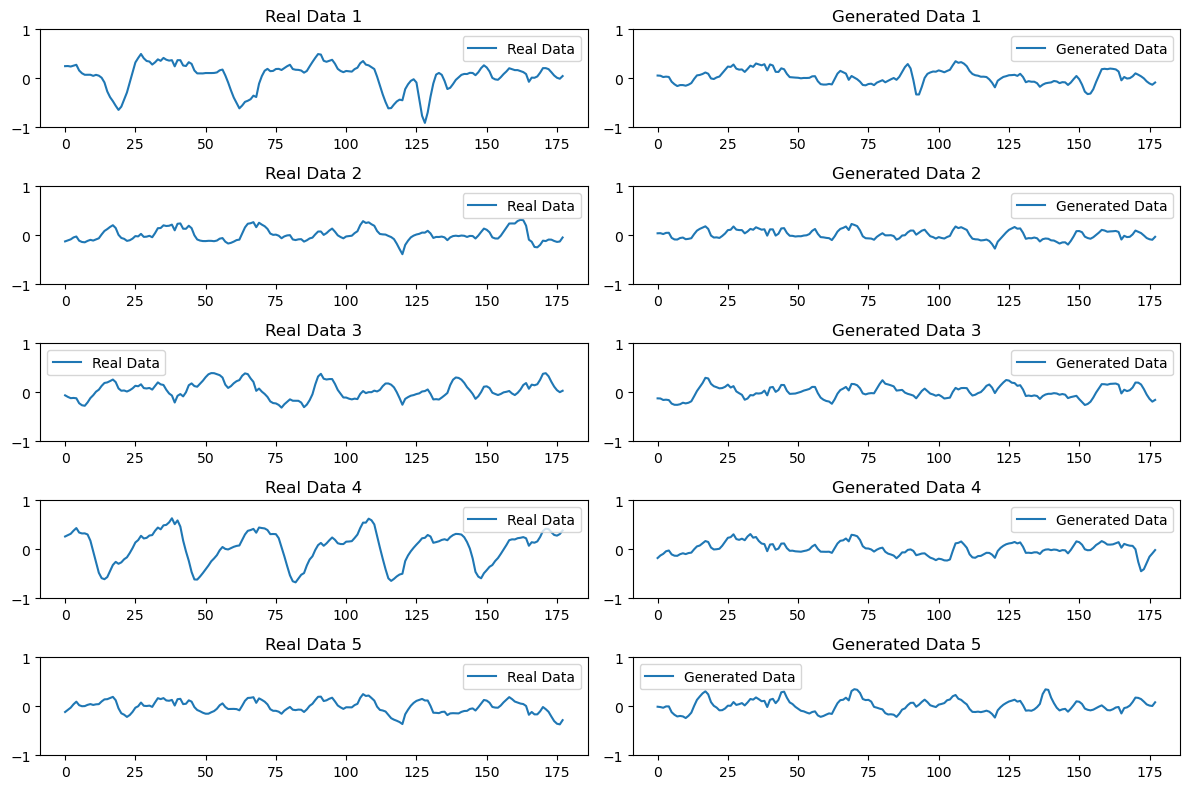

In [26]:
import matplotlib.pyplot as plt

def visualize_audio_samples(generator, real_data, num_examples=5):
    # Generate random latent vectors
    random_latent_vectors = tf.random.normal(shape=(num_examples, 100))
    # Use the generator to create fake audio data
    generated_data = generator(random_latent_vectors, training=False)

    plt.figure(figsize=(12, 8))
    for i in range(num_examples):
        # Plot real audio data
        plt.subplot(num_examples, 2, 2*i + 1)
        plt.plot(real_data[i], label='Real Data')
        plt.title(f'Real Data {i+1}')
        plt.ylim([-1, 1])
        plt.legend()

        # Plot generated audio data
        plt.subplot(num_examples, 2, 2*i + 2)
        plt.plot(generated_data[i, :, 0], label='Generated Data')
        plt.title(f'Generated Data {i+1}')
        plt.ylim([-1, 1])
        plt.legend()

    plt.tight_layout()
    plt.show()

# After training, call the visualization function
real_samples = x_data[:5]  # Selecting a few samples from your real dataset
visualize_audio_samples(wavegan.generator, real_samples)


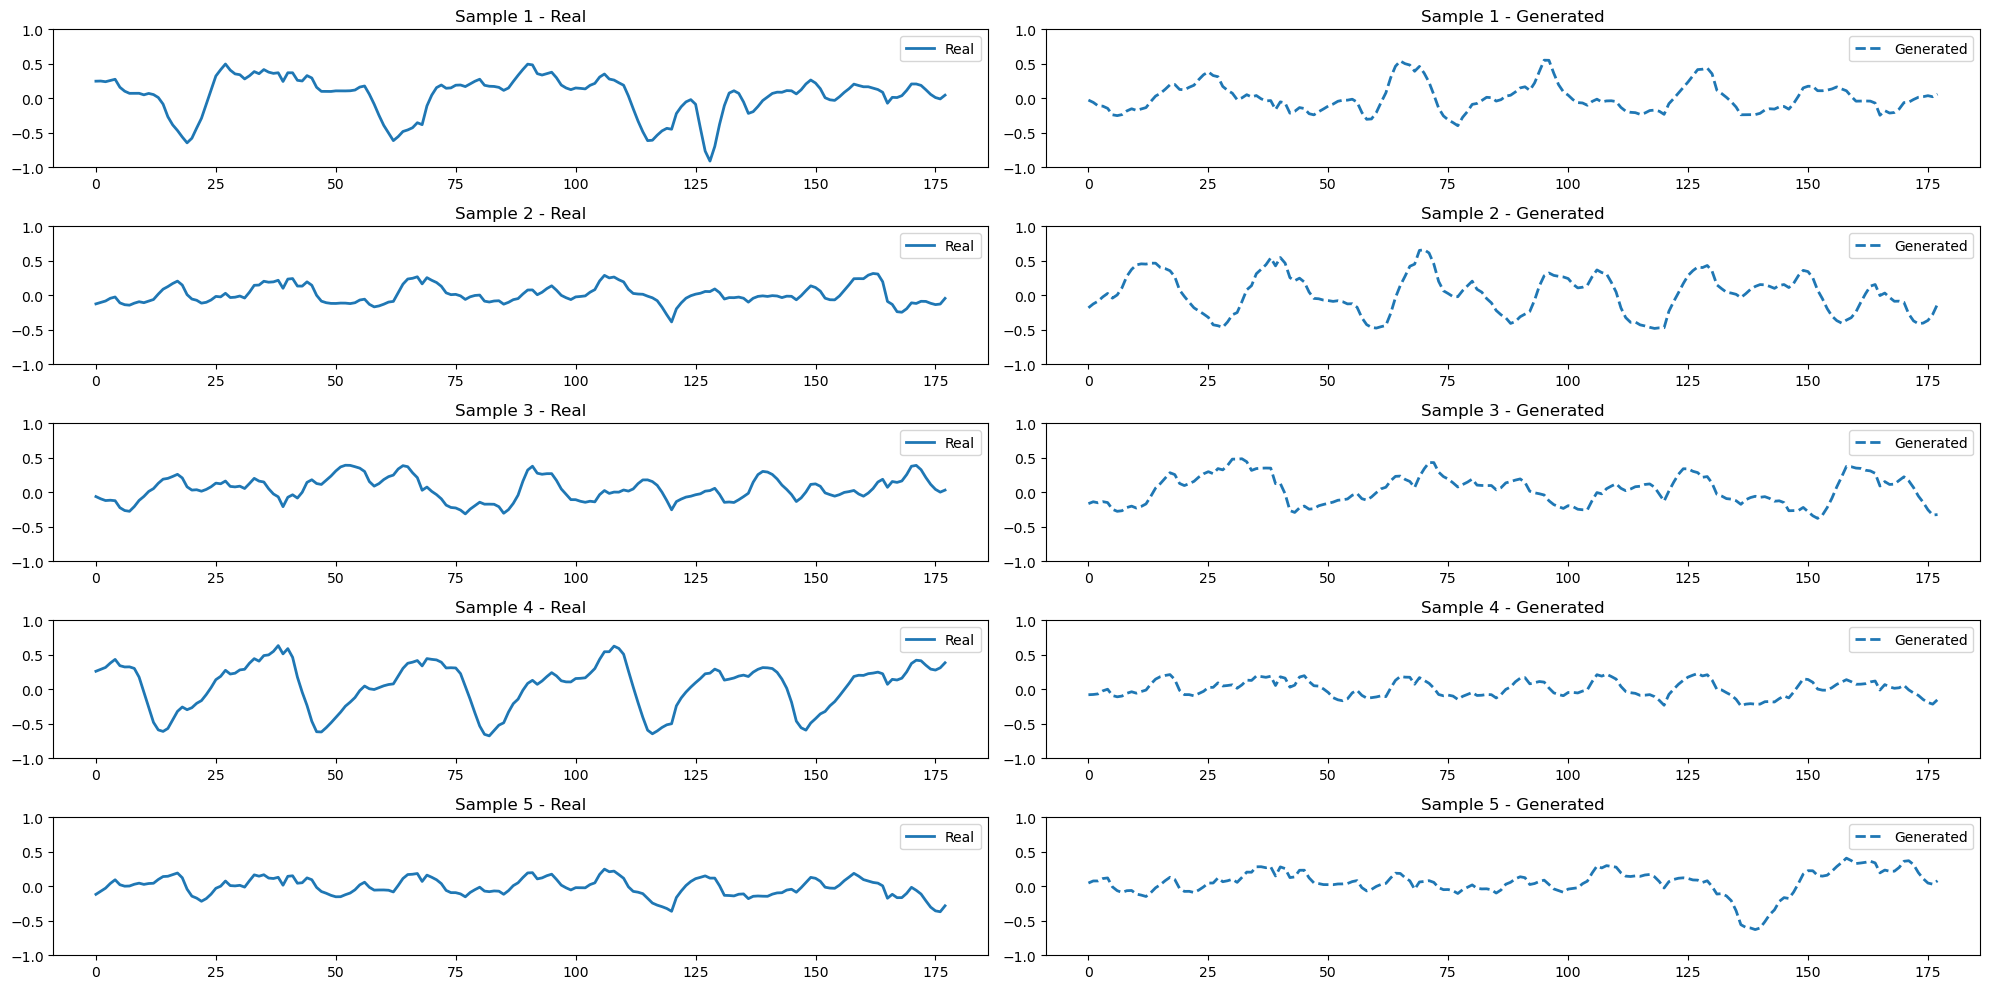

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def visualize_audio_comparison(generator, real_data, num_samples=5):
    # Generate random latent vectors
    random_latent_vectors = tf.random.normal(shape=(num_samples, 100))
    # Generate fake audio data from these latent vectors
    generated_data = generator(random_latent_vectors, training=False).numpy()

    # Assuming real_data is already loaded and normalized as needed
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.plot(real_data[i].flatten(), label='Real', linewidth=2)
        plt.title(f'Sample {i+1} - Real')
        plt.ylim([-1, 1])
        plt.legend()

        plt.subplot(num_samples, 2, 2*i + 2)
        plt.plot(generated_data[i].flatten(), label='Generated', linestyle='--', linewidth=2)
        plt.title(f'Sample {i+1} - Generated')
        plt.ylim([-1, 1])
        plt.legend()

    plt.tight_layout()
    plt.show()

# Sample usage:
# Ensure your real_data is loaded correctly and formatted as (samples, 1024, 1)
# E.g., real_samples = x_data[:5] if x_data is your dataset
visualize_audio_comparison(wavegan.generator, real_samples)


In [ ]:
class WaveGAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(WaveGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(WaveGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 100))

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(random_latent_vectors, training=True)

            real_output = self.discriminator(real_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)

            gen_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)
            real_loss = self.loss_fn(tf.ones_like(real_output), real_output)
            fake_loss = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            disc_loss = real_loss + fake_loss

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_weights)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_weights)

        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_weights))
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_weights))

        return {'gen_loss': gen_loss, 'disc_loss': disc_loss}

# Create the models
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()

# Compile the model
wavegan = WaveGAN(discriminator=discriminator, generator=generator)
wavegan.compile(
    d_optimizer=optimizers.Adam(1e-4),
    g_optimizer=optimizers.Adam(1e-4),
    loss_fn=losses.BinaryCrossentropy(from_logits=True)
)

# Training needs real audio data reshaped to (batch_size, 1024, 1)
wavegan.fit(x_data, epochs=20000)

In [ ]:
import matplotlib.pyplot as plt

def visualize_audio_samples(generator, real_data, num_examples=5):
    # Generate random latent vectors
    random_latent_vectors = tf.random.normal(shape=(num_examples, 100))
    # Use the generator to create fake audio data
    generated_data = generator(random_latent_vectors, training=False)

    plt.figure(figsize=(12, 8))
    for i in range(num_examples):
        # Plot real audio data
        plt.subplot(num_examples, 2, 2*i + 1)
        plt.plot(real_data[i], label='Real Audio')
        plt.title(f'Real Audio {i+1}')
        plt.ylim([-1, 1])
        plt.legend()

        # Plot generated audio data
        plt.subplot(num_examples, 2, 2*i + 2)
        plt.plot(generated_data[i, :, 0], label='Generated Audio')
        plt.title(f'Generated Audio {i+1}')
        plt.ylim([-1, 1])
        plt.legend()

    plt.tight_layout()
    plt.show()

# After training, call the visualization function
real_samples = x_data[:5]  # Selecting a few samples from your real dataset
visualize_audio_samples(wavegan.generator, real_samples)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def visualize_audio_comparison(generator, real_data, num_samples=5):
    # Generate random latent vectors
    random_latent_vectors = tf.random.normal(shape=(num_samples, 100))
    # Generate fake audio data from these latent vectors
    generated_data = generator(random_latent_vectors, training=False).numpy()

    # Assuming real_data is already loaded and normalized as needed
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.plot(real_data[i].flatten(), label='Real', linewidth=2)
        plt.title(f'Sample {i+1} - Real')
        plt.ylim([-1, 1])
        plt.legend()

        plt.subplot(num_samples, 2, 2*i + 2)
        plt.plot(generated_data[i].flatten(), label='Generated', linestyle='--', linewidth=2)
        plt.title(f'Sample {i+1} - Generated')
        plt.ylim([-1, 1])
        plt.legend()

    plt.tight_layout()
    plt.show()

# Sample usage:
# Ensure your real_data is loaded correctly and formatted as (samples, 1024, 1)
# E.g., real_samples = x_data[:5] if x_data is your dataset
visualize_audio_comparison(wavegan.generator, real_samples)


##3

In [ ]:
# Building the discriminator network
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(178,)),
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for probabilistic output
], name="SigXNet-Discriminator")

discriminator.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
    loss=tf.keras.losses.binary_crossentropy,  # Correct based on sigmoid output
    metrics=['accuracy']
)
discriminator.summary()
# Define the generator model using SigXNet
generator = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(100,)),  # Latent dimension size
    tf.keras.layers.Dense(128, activation='selu'),
    tf.keras.layers.Dense(178, activation='tanh')  # Outputs should match the discriminator's input shape
], name="SigXNet-Generator")

# Compile the generator
generator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Use Adam optimizer for generator
    loss=tf.keras.losses.binary_crossentropy  # Generator loss is not used in training GANs
)
# Compiling the GAN model
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        # Sample random points in the latent space
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, 100))

        # Decode them to fake data
        generated_data = self.generator(random_latent_vectors)

        # Combine them with real data
        combined_data = tf.concat([generated_data, real_data], axis=0)
        labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)  # Reversed labels for training
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_data)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Misleading labels for the generator
        misleading_labels = tf.ones((batch_size, 1))

        # Train the generator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        return {'d_loss': d_loss, 'g_loss': g_loss}

    def generate(self, num_samples):
        random_latent_vectors = tf.random.normal(shape=(num_samples, 100))
        return self.generator(random_latent_vectors).numpy()

# Instantiate and compile the GAN
gan = GAN(discriminator=discriminator, generator=generator)
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False)  # Align this with sigmoid activation in discriminator
)

gan.fit(x_data, epochs=2000)  # Number of epochs and callbacks as per your specific needs

In [ ]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(178,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name = "SigXNet-Discriminator")

discriminator.compile(optimizer = tf.keras.optimizers.SGD(lr = 1e-3), loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
discriminator.summary()

Model: "SigXNet-Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 178)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               22912     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23041 (90.00 KB)
Trainable params: 23041 (90.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

latent_dim = 100

generator = tf.keras.models.Sequential([
    tf.keras.Input(shape=(latent_dim)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(178),
], name = "SigXNet-Generator")

generator.compile(optimizer = tf.keras.optimizers.SGD(lr = 1e-3), loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])
generator.summary()


Model: "SigXNet-Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               12928     
                                                                 
 dense_5 (Dense)             (None, 178)               22962     
                                                                 
Total params: 35890 (140.20 KB)
Trainable params: 35890 (140.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = tf.keras.Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = tf.keras.models.Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.SGD(lr = 1e-3))
    return gan

gan = create_gan(discriminator, generator)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 SigXNet-Generator (Sequent  (None, 178)               35890     
 ial)                                                            
                                                                 
 SigXNet-Discriminator (Seq  (None, 1)                 23041     
 uential)                                                        
                                                                 
Total params: 58931 (230.20 KB)
Trainable params: 35890 (140.20 KB)
Non-trainable params: 23041 (90.00 KB)
_________________________________________________________________


In [ ]:

disc_loss = []
gene_loss = []
epochs = 5
batch_size = 128
x_train = x_data.to_numpy()

for e in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0, 1, [batch_size, 100])
        generated_signal = generator.predict(noise)

        signal_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]
        x = np.concatenate([signal_batch, generated_signal])

        y_disc = np.zeros(batch_size * 2)
        y_disc[:batch_size] = 1

        discriminator.trainable = True
        discriminator_loss = discriminator.train_on_batch(x, y_disc)

        noise = np.random.normal(0, 1, [batch_size, 100])
        y_gene = np.ones(batch_size)

        discriminator.trainable = False
        generator_loss = gan.train_on_batch(noise, y_gene)

        disc_loss.append(discriminator_loss)
        gene_loss.append(generator_loss)

    if (e % 2 == 0) or (e == epochs - 1):
        print("Epochs: ", e)
    if e == epochs-1:
        print("Training Complete")

4/4 [==============================] - 0s 1ms/step
Epochs:  0
4/4 [==============================] - 0s 2ms/step
Epochs:  2
4/4 [==============================] - 0s 1ms/step
Epochs:  4
Training Complete


In [ ]:

generator.save("generator.h5") # you can donwload this model from output part of this kernel.
discriminator.save("discriminator.h5") # you can donwload this model from output part of this kernel.


c:\Users\saumi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


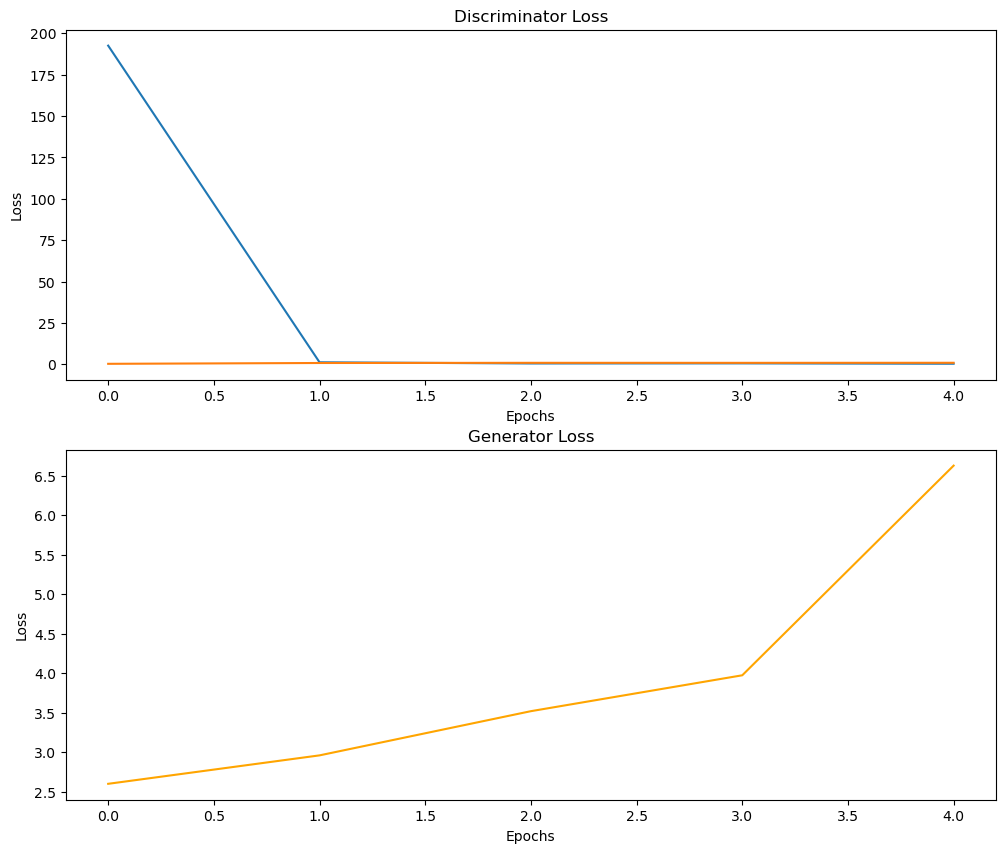

In [ ]:

import matplotlib.pyplot as plt

index = 0
D_loss2 = []
G_loss2 = []

for i in range(1,epochs+1):
    D_loss2.append(disc_loss[index])
    G_loss2.append(gene_loss[index])
    index += batch_size

fig, axs = plt.subplots(2, 1, figsize = (12,10))

axs[0].plot(D_loss2, label = "Discriminator Loss")
axs[1].plot(G_loss2, label = "Generator Loss", color = "orange")

axs[0].set_xlabel("Epochs")
axs[1].set_xlabel("Epochs")

axs[0].set_ylabel("Loss")
axs[1].set_ylabel("Loss")

axs[0].set_title("Discriminator Loss")
axs[1].set_title("Generator Loss")
plt.show()

In [ ]:

samples = 5
noise = np.random.normal(0, 1, (samples,100))
audios = generator.predict(noise)

1/1 [==============================] - 0s 39ms/step


In [ ]:
audios.shape


(5, 178)

In [ ]:
discriminator.predict(audios)


1/1 [==============================] - 0s 82ms/step


array([[0.11757765],
       [0.9999293 ],
       [0.00837865],
       [0.00776336],
       [0.1765617 ]], dtype=float32)

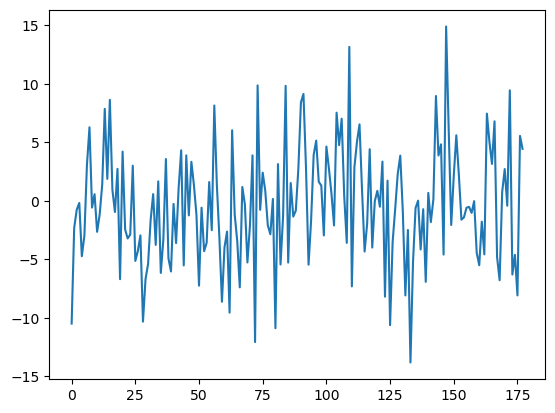

In [ ]:
plt.plot(audios[4])


In [ ]:

class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [ ]:
class GANMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))

In [ ]:
import numpy as np
# Check the shapes of x_data and y_data after the adjustments
print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)

x_data shape: (2300, 178)
y_data shape: (2300, 1)


In [ ]:

epochs = 1000  # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=tf.keras.losses.BinaryCrossentropy(),
)

gan.fit(x_data, y_data, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)])



Epoch 1/1000


ValueError: in user code:

    File "c:\Users\saumi\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\saumi\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\saumi\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\saumi\AppData\Local\Temp\ipykernel_29580\3174023776.py", line 22, in train_step
        batch_size = tf.shape(real_images)[0]

    ValueError: Dimension 1 in both shapes must be equal, but are 178 and 1. Shapes are [?,178] and [?,1].
    	From merging shape 0 with other shapes. for '{{node Shape/packed}} = Pack[N=2, T=DT_INT64, axis=0](IteratorGetNext, IteratorGetNext:1)' with input shapes: [?,178], [?,1].


In [ ]:
y_data.shape

(2300,)

In [ ]:
# Define WaveGAN class
class WaveGAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(WaveGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(WaveGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))

        # Generate fake data
        generated_data = self.generator(random_latent_vectors)

        # Train discriminator
        with tf.GradientTape() as disc_tape:
            real_output = self.discriminator(real_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)
            d_loss_real = self.loss_fn(tf.ones_like(real_output), real_output)
            d_loss_fake = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            d_loss = (d_loss_real + d_loss_fake) / 2

        # Train generator
        with tf.GradientTape() as gen_tape:
            fake_output = self.discriminator(generated_data, training=False)
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)

        d_grads = disc_tape.gradient(d_loss, self.discriminator.trainable_weights)
        g_grads = gen_tape.gradient(g_loss, self.generator.trainable_weights)

        self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_weights))
        self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_weights))

        return {'d_loss': d_loss, 'g_loss': g_loss}

# Instantiate WaveGAN
wavegan = WaveGAN(discriminator=discriminator, generator=generator)

# Compile WaveGAN
wavegan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)



# Train the WaveGAN model
wavegan.fit(x_data, y_data, epochs=100, batch_size=32)  # Adjust epochs and batch size as needed


Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "<ipython-input-35-98c8db5fabf1>", line 15, in train_step
        batch_size = tf.shape(real_data)[0]

    ValueError: Dimension 1 in both shapes must be equal, but are 178 and 1. Shapes are [?,178] and [?,1].
    	From merging shape 0 with other shapes. for '{{node Shape/packed}} = Pack[N=2, T=DT_FLOAT, axis=0](IteratorGetNext, IteratorGetNext:1)' with input shapes: [?,178], [?,1].


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Discriminator Model
def build_discriminator(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(128, activation='selu'),
        layers.Dense(1, activation='sigmoid')
    ], name="WaveGAN-Discriminator")
    return model

# Generator Model
def build_generator(latent_dim, output_shape):
    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, activation='selu'),
        layers.Dense(output_shape, activation='tanh')
    ], name="WaveGAN-Generator")
    return model

# Define WaveGAN class
class WaveGAN(tf.keras.Model):
    def __init__(self, discriminator, generator):
        super(WaveGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(WaveGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_data):
        batch_size = tf.shape(real_data)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))

        # Generate fake data
        generated_data = self.generator(random_latent_vectors)

        # Train discriminator
        with tf.GradientTape() as disc_tape:
            real_output = self.discriminator(real_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)
            d_loss_real = self.loss_fn(tf.ones_like(real_output), real_output)
            d_loss_fake = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            d_loss = (d_loss_real + d_loss_fake) / 2

        # Train generator
        with tf.GradientTape() as gen_tape:
            fake_output = self.discriminator(generated_data, training=False)
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)

        d_grads = disc_tape.gradient(d_loss, self.discriminator.trainable_weights)
        g_grads = gen_tape.gradient(g_loss, self.generator.trainable_weights)

        self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_weights))
        self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_weights))

        return {'d_loss': d_loss, 'g_loss': g_loss}

# Instantiate WaveGAN
wavegan = WaveGAN(discriminator=discriminator, generator=generator)

# Compile WaveGAN
wavegan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

y_data = y_data.reshape(-1, 1)


# Train the WaveGAN model
wavegan.fit(x_data, y_data, epochs=100, batch_size=32)  # Adjust epochs and batch size as needed



Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "<ipython-input-38-012497b15105>", line 36, in train_step
        batch_size = tf.shape(real_data)[0]

    ValueError: Dimension 1 in both shapes must be equal, but are 178 and 1. Shapes are [?,178] and [?,1].
    	From merging shape 0 with other shapes. for '{{node Shape/packed}} = Pack[N=2, T=DT_FLOAT, axis=0](IteratorGetNext, IteratorGetNext:1)' with input shapes: [?,178], [?,1].
